# Working With Large Datasets: PLACES LOCAL Data for Better Health.

!['Places_data'](https://drive.google.com/uc?export=view&id=1P8axquXzPg4ixflLtHXs69GZQb5dygUZ)


# Purpose
The purpose of this project is to accomplish two main tasks. 
1) Test Whether or not States with more PLACES locations have different means that those with fewer locations, and how they differ exactly.
2) Sucessfully work with very large data sets: Cleaning, organizinng and performing analyisis on them. 

image credit: https://www.cdc.gov/places/index.html


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
from distfit import distfit
import statsmodels.api as sm 
import pylab
from numpy import cov
from itertools import permutations 
import itertools
from scipy.stats import spearmanr
from random import sample 
import random 
from collections import Counter
from tabulate import tabulate
import requests
import zipfile
import io
import os  
from scipy.stats import iqr
import scikit_posthocs as sp
pd.set_option('display.max_colwidth', None)

# Data Background, Loading, Inspection
The CDC and Robert Wood Johnson foundation have been partnering for the last few years to provide a huge repository of data and metrics on public health*. \
This data is known as the PLACES dataset.The purpose of such data is to help the CDC stay ahead of emerging disease trends. \
There are hundreds of cities and many disease metrics that are tracked,\
meaning a vast amount of information can be mined and gained from such a repository.\
My project hopes to do two things: First would be to navigate such a large dataset successfully,\
second to answer the question: For the States with more PLACES data locations, are disease metrics generally different. And how do they differ? 

## Data loading
There are many ways to acess the files that are needed. Either downloading from github, \
or if the files are too big  we can use the shortcuts themselves. And download right from the source. \
The files can be found below. The next few cells load in the data and put it into the current working directory. 
Note: The 2020 release covers 2017-2018, 2021 release 2019-2020 and 2022 release 2020-2021.




https://catalog.data.gov/dataset/places-local-data-for-better-health-place-data-2022-release/resource/4bfea8ab-534b-4f2b-9cb1-d0b951709c2a 

https://catalog.data.gov/dataset/places-local-data-for-better-health-place-data-2021-release-06a9b/resource/f9bb4b0d-7db2-432e-bf3e-58bd400a6ffc 

https://catalog.data.gov/dataset/places-local-data-for-better-health-place-data-2020-release-670b7/resource/b95272f6-c03d-487b-81fa-460d4b9bcb1f 



https://www.cdc.gov/places/index.html*

In [2]:
current_directory = os.getcwd()

print('Downloading started')
url = 'https://github.com/oohtmeel1/Data_Mining_Final/raw/main/s2020.zip'

# Downloading the file by sending the request to the URL
req = requests.get(url)

# Check if the request was successful (status code 200)
if req.status_code == 200:
    # Create a BytesIO object from the content
    zip_content = io.BytesIO(req.content)

    # Get the current working directory
    current_directory = os.getcwd()
    print(f'Current Working Directory: {current_directory}')

    # Specify the directory where you want to extract the contents
    extraction_path = 'zipped_files_now'  
    zip_ref = zipfile.ZipFile(zip_content, 'r')

    # Create the extraction directory if it doesn't exist
    os.makedirs(extraction_path, exist_ok=True)

    # Join the extraction path and the filename
    extraction_file_path = os.path.join(extraction_path, 's2020.zip')

    # Extract the contents
    zip_ref.extractall(extraction_file_path)
    zip_ref.close()

Current Working Directory: c:\Users\amcfa\gitfiles\Projects\MastersWork\Data_mining_project


In [3]:
extraction_path = 'zipped_files_now'
# Specify the filename 
csv_filename = 's2020.csv'  # Replace with the actual CSV file name

# Join the extraction path and the filename
csv_file_path = os.path.join(extraction_path, csv_filename)


    # Read the CSV file into a DataFrame
s2020 = pd.read_csv(csv_file_path)

In [4]:


url = 'https://data.cdc.gov/api/views/q8ig-wwk9/rows.csv?accessType=DOWNLOAD'

# Downloading the file by sending the request to the URL
req = requests.get(url)

# Check if the request was successful 
if req.status_code == 200:
    # Create a BytesIO object from the content
    s2021 = pd.read_csv(io.StringIO(req.text))


In [5]:
import requests
import pandas as pd

url = ' https://data.cdc.gov/api/views/epbn-9bv3/rows.csv?accessType=DOWNLOAD'

# Downloading the file by sending the request to the URL
req = requests.get(url)

# Check if the request was successful 
if req.status_code == 200:
    # Create a BytesIO object from the content
    s2022 = pd.read_csv(io.StringIO(req.text))

In [6]:
s2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685026 entries, 0 to 1685025
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Year                        1685026 non-null  int64  
 1   StateAbbr                   1685026 non-null  object 
 2   StateDesc                   1685026 non-null  object 
 3   LocationName                1685026 non-null  object 
 4   DataSource                  1685026 non-null  object 
 5   Category                    1685026 non-null  object 
 6   Measure                     1685026 non-null  object 
 7   Data_Value_Unit             1685026 non-null  object 
 8   Data_Value_Type             1685026 non-null  object 
 9   Data_Value                  1653627 non-null  float64
 10  Data_Value_Footnote_Symbol  31399 non-null    object 
 11  Data_Value_Footnote         31399 non-null    object 
 12  Low_Confidence_Limit        1653627 non-null  float64
 1

In [7]:
s2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593206 entries, 0 to 1593205
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Year                   1593206 non-null  int64  
 1   StateAbbr              1593206 non-null  object 
 2   LocationName           1593206 non-null  object 
 3   DataSource             1593206 non-null  object 
 4   Measure                1593206 non-null  object 
 5   Data_Value_Unit        1593206 non-null  object 
 6   Data_Value_Type        1593206 non-null  object 
 7   Data_Value             1593206 non-null  float64
 8   Low_Confidence_Limit   1593206 non-null  float64
 9   High_Confidence_Limit  1593206 non-null  float64
 10  TotalPopulation        1593206 non-null  int64  
 11  Geolocation            1593206 non-null  object 
 12  LocationID             1593206 non-null  int64  
 13  CategoryID             1593206 non-null  object 
 14  MeasureId         

In [8]:
s2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704502 entries, 0 to 1704501
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        int64  
 1   StateAbbr                   object 
 2   StateDesc                   object 
 3   LocationName                object 
 4   DataSource                  object 
 5   Category                    object 
 6   Measure                     object 
 7   Data_Value_Unit             object 
 8   Data_Value_Type             object 
 9   Data_Value                  float64
 10  Data_Value_Footnote_Symbol  object 
 11  Data_Value_Footnote         object 
 12  Low_Confidence_Limit        float64
 13  High_Confidence_Limit       float64
 14  TotalPopulation             int64  
 15  Geolocation                 object 
 16  LocationID                  int64  
 17  CategoryID                  object 
 18  MeasureId                   object 
 19  DataValueTypeID      

# Some Basic Data Cleaning
All NA values are dropped. And all rows and columns have been inspected to ensure correctness.\
The only null values remaining are data value footnotes(Which are NaN) but are of no importance.\
Otherwise the Data Value Column does not containy any null values. And looking at the info shows \
there are no very large values.Which is a good sign that there are no random digits present.

In [9]:
# Drop NA values
s2020['Measure'] = s2020['Measure'].str.replace(" ", "_") # Strip whitespace and replace with _
s2021['Measure'] = s2021['Measure'].str.replace(" ", "_") # Strip whitespace and replace with _
s2022['Measure'] = s2022['Measure'].str.replace(" ", "_") # Strip whitespace and replace with _
s2020= s2020[s2020['Data_Value'].notna()]
s2021= s2021[s2021['Data_Value'].notna()]
s2022= s2022[s2022['Data_Value'].notna()]

In [10]:
np.where(pd.isnull(s2020['Data_Value'])) # Returns where the dataframe is null

(array([], dtype=int64),)

In [11]:
np.where(pd.isnull(s2021['Data_Value']))

(array([], dtype=int64),)

In [12]:
np.where(pd.isnull(s2022['Data_Value']))

(array([], dtype=int64),)

In [13]:
s2020.loc[s2020['Data_Value'].idxmax()]

Year                                                                   2017
StateAbbr                                                                NJ
LocationName                                                     Brookfield
DataSource                                                            BRFSS
Measure                  Cholesterol_screening_among_adults_aged_>=18_years
Data_Value_Unit                                                           %
Data_Value_Type                                            Crude prevalence
Data_Value                                                             97.3
Low_Confidence_Limit                                                   96.9
High_Confidence_Limit                                                  97.7
TotalPopulation                                                         675
Geolocation                                POINT (-75.06129183 40.81840557)
LocationID                                                          3408140
CategoryID  

In [14]:
s2021.loc[s2021['Data_Value'].idxmax()]

Year                                                                        2019
StateAbbr                                                                     FL
StateDesc                                                                Florida
LocationName                                                         Punta Rassa
DataSource                                                                 BRFSS
Category                                                              Prevention
Measure                       Cholesterol_screening_among_adults_aged_>=18_years
Data_Value_Unit                                                                %
Data_Value_Type                                                 Crude prevalence
Data_Value                                                                  97.1
Data_Value_Footnote_Symbol                                                   NaN
Data_Value_Footnote                                                          NaN
Low_Confidence_Limit        

In [15]:
s2022.loc[s2022['Data_Value'].idxmax()]

Year                                                                        2019
StateAbbr                                                                     FL
StateDesc                                                                Florida
LocationName                                                         Punta Rassa
DataSource                                                                 BRFSS
Category                                                              Prevention
Measure                       Cholesterol_screening_among_adults_aged_>=18_years
Data_Value_Unit                                                                %
Data_Value_Type                                                 Crude prevalence
Data_Value                                                                  97.1
Data_Value_Footnote_Symbol                                                   NaN
Data_Value_Footnote                                                          NaN
Low_Confidence_Limit        

# Some basic visualizations
How are the locations distributed for each state?
The number of unique locations are counted and plotted.

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Number of locations '),
 Text(0.5, 1.0, 'Locations per State 2017-2018')]

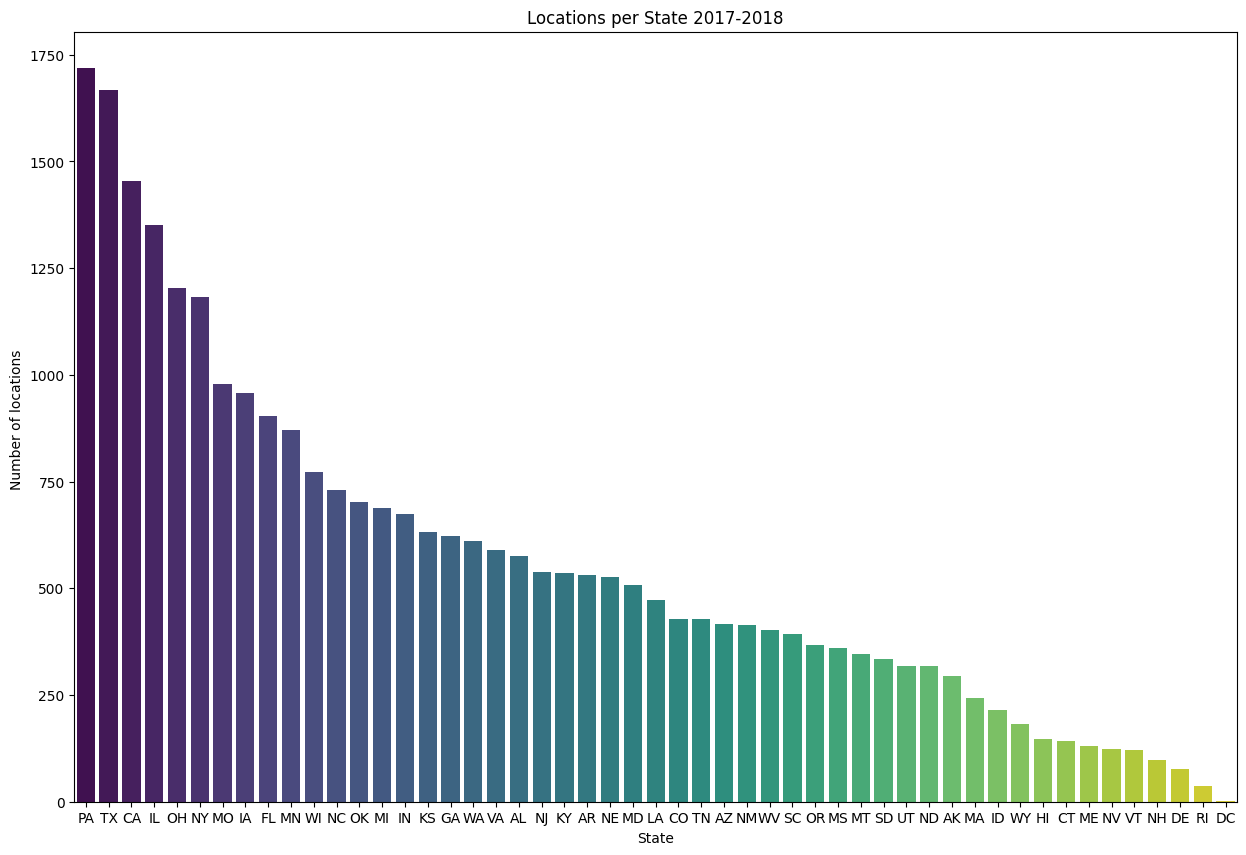

In [16]:
city_counts1 = s2020.groupby('StateAbbr')['LocationName'].nunique()
city_counts1 = city_counts1.sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(city_counts1,palette="viridis")

ax.set(xlabel="State",ylabel ="Number of locations ",title="Locations per State 2017-2018")


[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Number of locations '),
 Text(0.5, 1.0, 'Locations per State 2018-2019')]

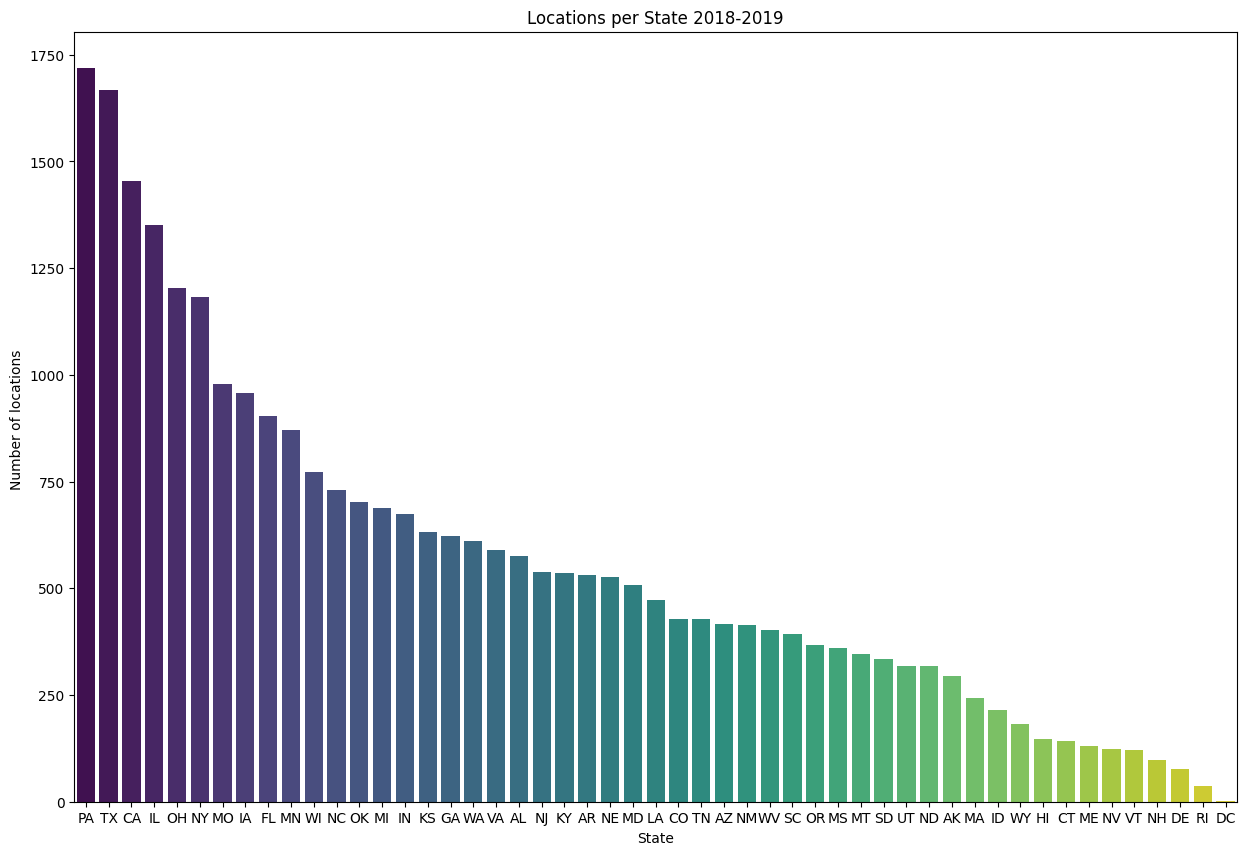

In [17]:
city_counts2 = s2021.groupby('StateAbbr')['LocationName'].nunique()
city_counts2 = city_counts2.sort_values(ascending=False)



fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(city_counts2,palette="viridis")

ax.set(xlabel="State",ylabel ="Number of locations ",title="Locations per State 2018-2019")

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Number of locations '),
 Text(0.5, 1.0, 'Locations per State 2019-2020')]

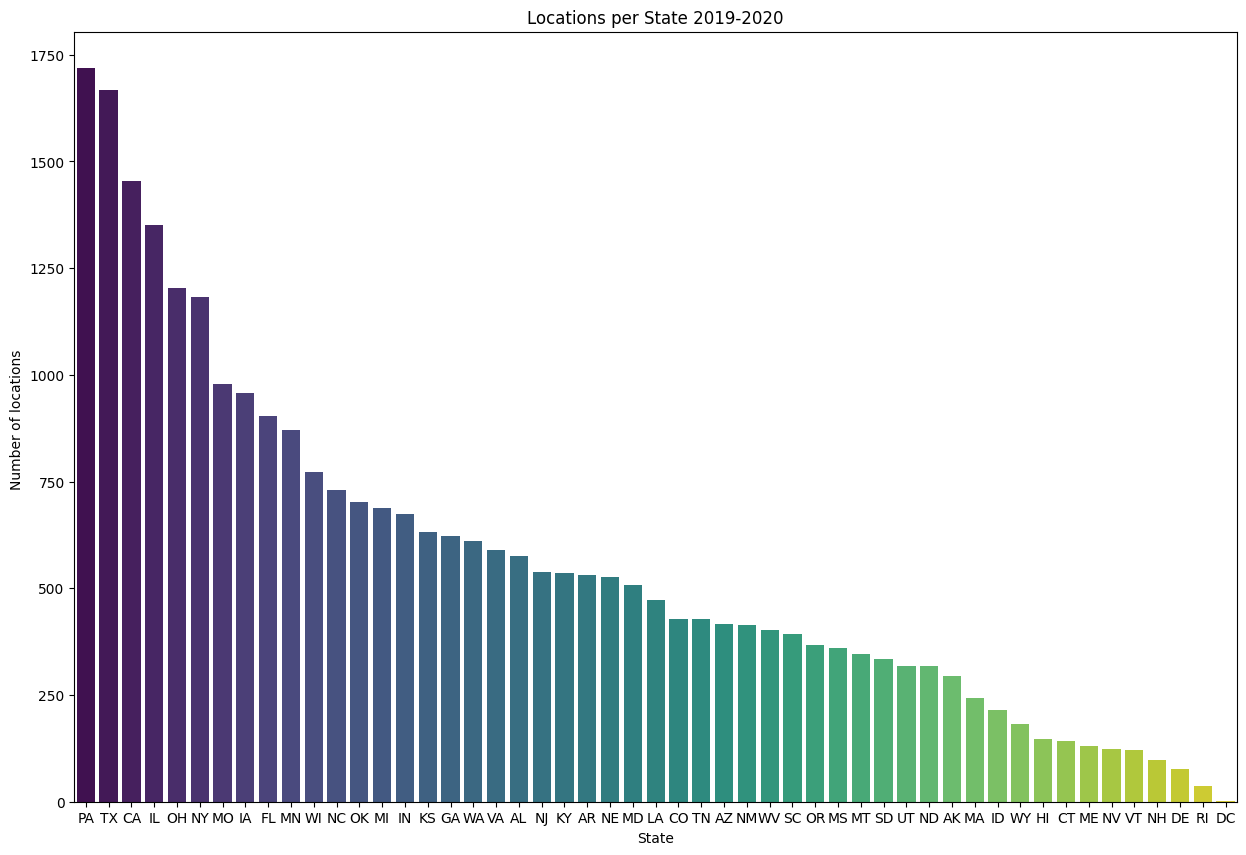

In [18]:
city_counts3 = s2022.groupby('StateAbbr')['LocationName'].nunique()
city_counts3 = city_counts3.sort_values(ascending=False)



fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(city_counts3,palette="viridis")

ax.set(xlabel="State",ylabel ="Number of locations ",title="Locations per State 2019-2020")

In [19]:

measure_counts = s2020.groupby(['StateAbbr', 'Measure']).size().reset_index(name='Count')

# What about how many data points per state?
The below plots answer the obvious. Do places with more locations measured overall \
 have a higher number of Data points obtained. Yes, the answer is yes. They also look fairly consistent year to year.

Text(0.5, 1.0, 'Count of Measures in Each State 2017-2018')

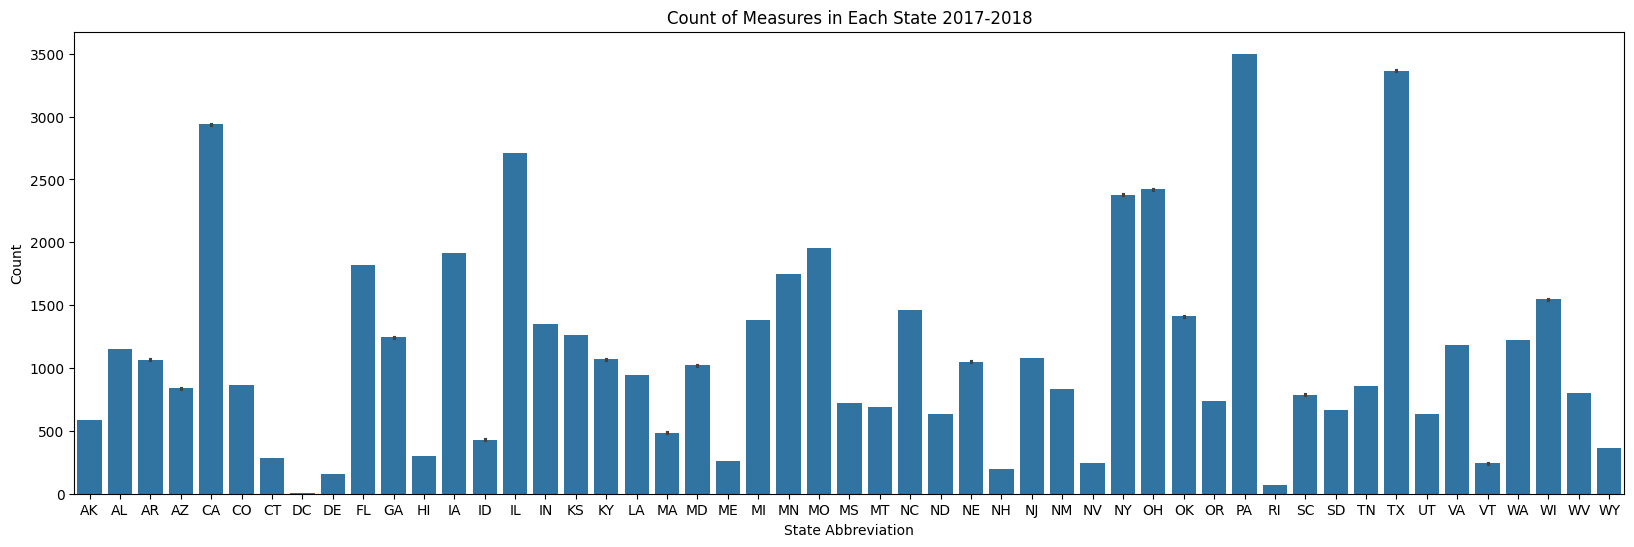

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x='StateAbbr', y='Count', data=measure_counts, dodge=True,legend=False)
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.title('Count of Measures in Each State 2017-2018')

In [21]:

measure_counts1 = s2021.groupby(['StateAbbr', 'Measure']).size().reset_index(name='Count')

Text(0.5, 1.0, 'Count of Measures in Each State 2018-2019')

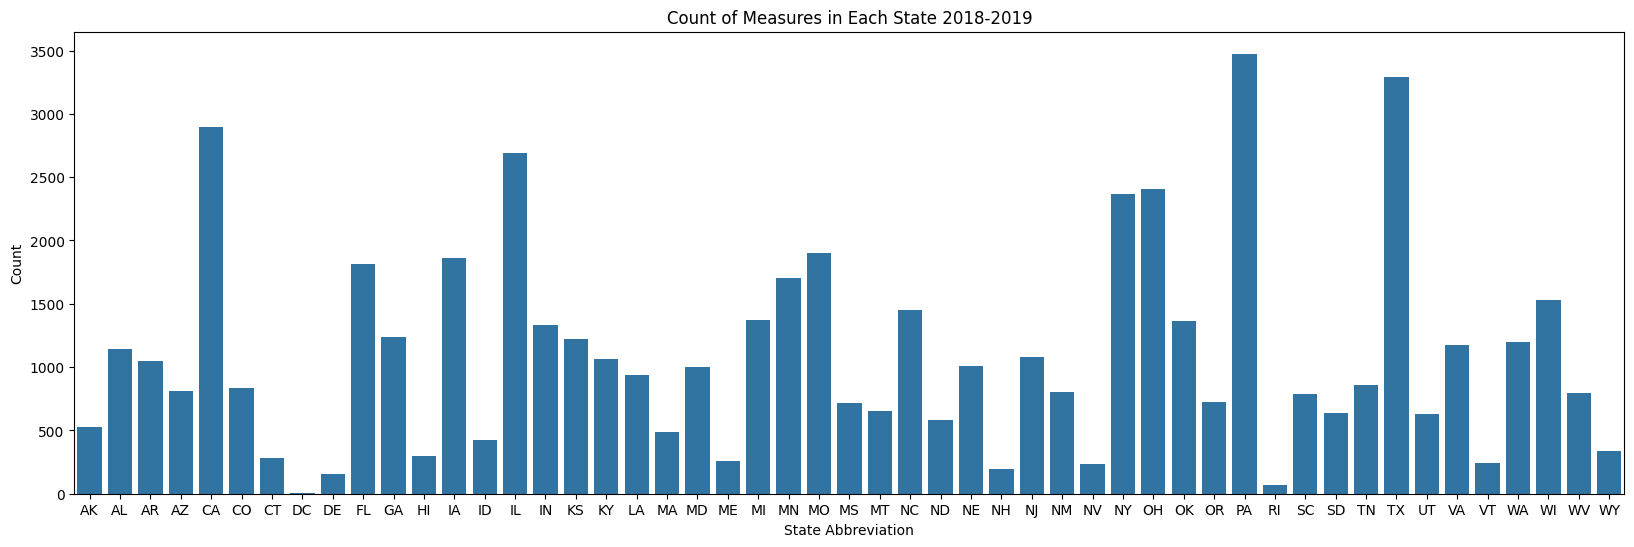

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(x='StateAbbr', y='Count', data=measure_counts1, dodge=True,legend=False)
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.title('Count of Measures in Each State 2018-2019')

In [23]:

measure_counts3 = s2022.groupby(['StateAbbr', 'Measure']).size().reset_index(name='Count')

Text(0.5, 1.0, 'Count of Measures in Each State 2019-2020')

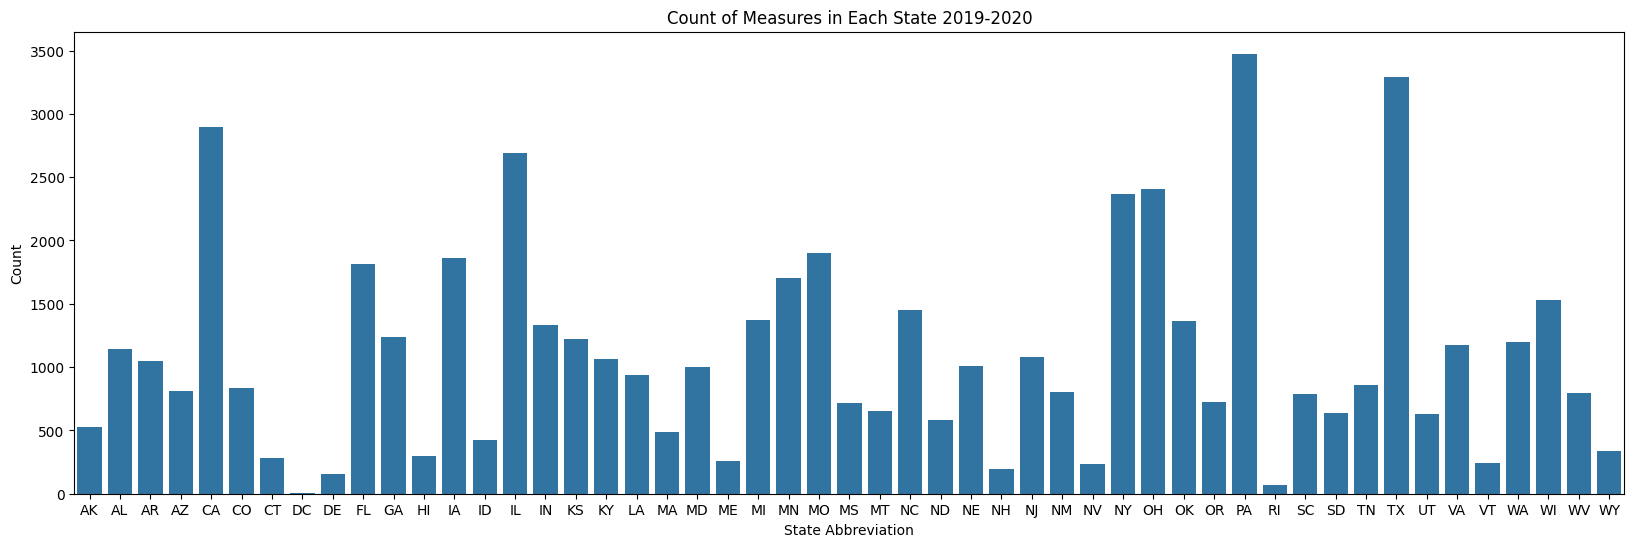

In [24]:
plt.figure(figsize=(20, 6))
sns.barplot(x='StateAbbr', y='Count', data=measure_counts3, dodge=True,legend=False)
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.title('Count of Measures in Each State 2019-2020')

# How are values divided up as far as category goes?
There are 3. PREVENT, HLTHOUT, abd UNHBEH.
* PREVENT - preventative
* HLTHOUT - health outcomes
* UNHBEH - unhealthy behavior. \
HLTHOUT always has the most, PREVENT seems to be second and UNHBEH usually has the smallest number of entries.

In [25]:

measure_counts5 = s2020.groupby(['StateAbbr', 'CategoryID']).size().reset_index(name='Count')

In [26]:
measure_counts6 = s2021.groupby(['StateAbbr', 'CategoryID']).size().reset_index(name='Count')

In [27]:
measure_counts7 = s2022.groupby(['StateAbbr', 'CategoryID']).size().reset_index(name='Count')

Text(0.5, 1.0, 'Count of Measures in Each State 2017-2018')

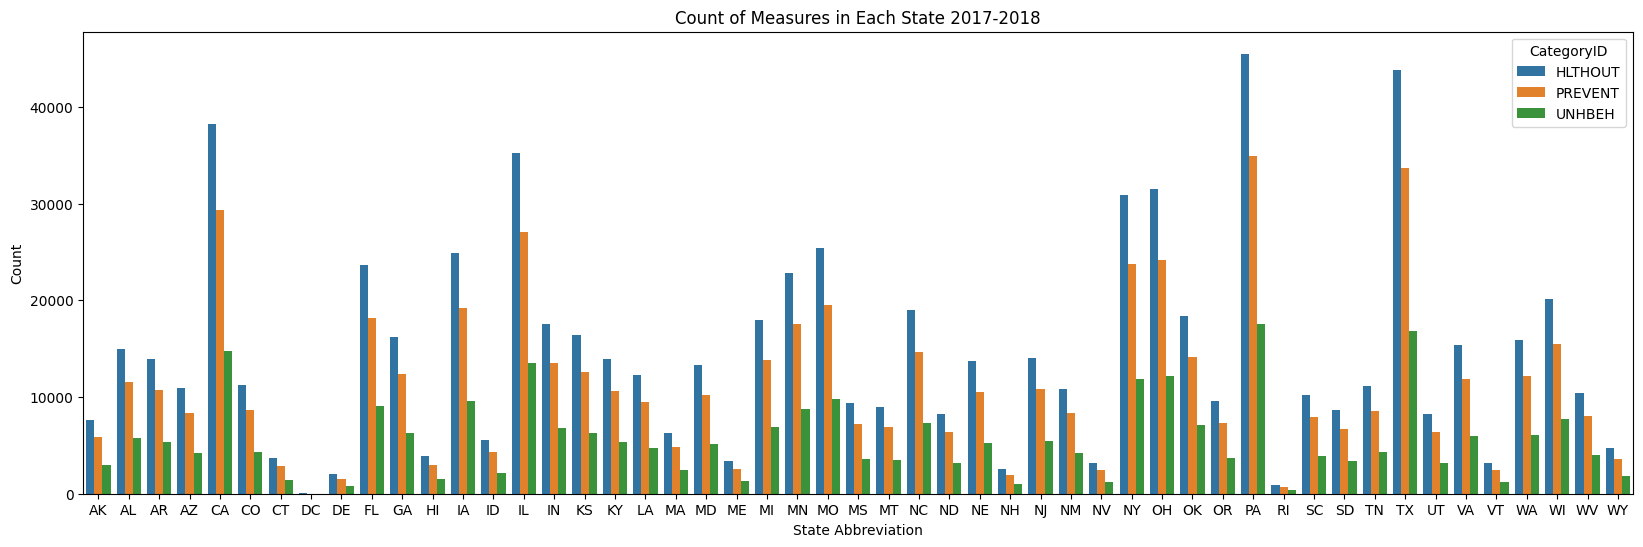

In [28]:
plt.figure(figsize=(20, 6))
sns.barplot(x='StateAbbr', y='Count', data=measure_counts5, hue ='CategoryID',dodge=True,legend=True)
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.title('Count of Measures in Each State 2017-2018')

Text(0.5, 1.0, 'Count of Measures in Each State 2018-2019')

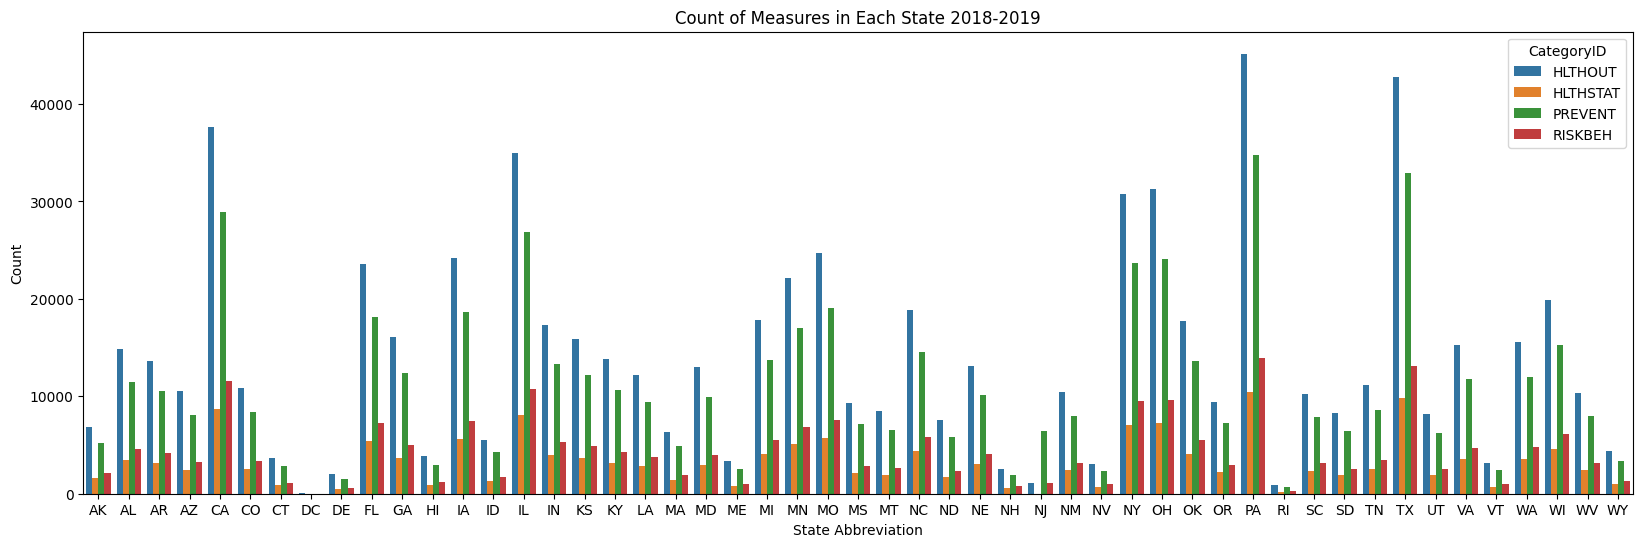

In [29]:
plt.figure(figsize=(20, 6))
sns.barplot(x='StateAbbr', y='Count', data=measure_counts6, hue ='CategoryID',dodge=True,legend=True)
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.title('Count of Measures in Each State 2018-2019')

Text(0.5, 1.0, 'Count of Measures in Each State 2019-2020')

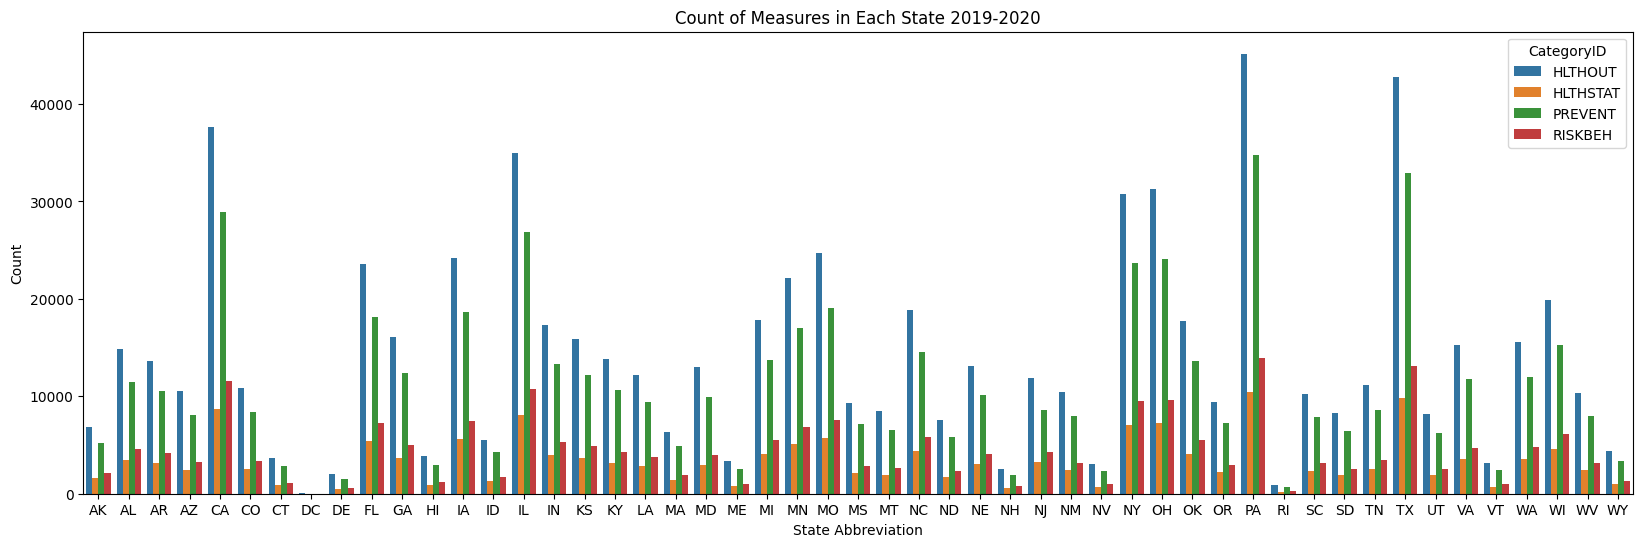

In [30]:
plt.figure(figsize=(20, 6))
sns.barplot(x='StateAbbr', y='Count', data=measure_counts7, hue ='CategoryID',dodge=True,legend=True)
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.title('Count of Measures in Each State 2019-2020')

# Code to split large dataframes into smaller chunks
It is really cumbersome trying to work with these dataframes as they are. So I am going to split them up into smaller bits.\
Working with such a large amounts of data can be a little bit unwieldy at first. 
So while it is not recommended for normal use, in this case \
I used the exec and eval functions to split the dataframes into smaller chunks\
Storing those in a list of dataframes. 


In [31]:

#Getting measures by themselves and creating just a ton of df
sa=s2020['StateAbbr'].unique()  # Getting all names of all sates
n = len(sa)
new_list_of_titles = []
dfs = []
for i in sa:
	if i not in new_list_of_titles:
		new_list_of_titles.append(i)
print(new_list_of_titles)


grouped = s2020.groupby(s2020['StateAbbr']) # Group by year
for i in new_list_of_titles:
	exec(f'{i}=grouped.get_group("{i}")')  # Using f string here to execute code. Getting the groups of the grouped well.groups. and executing based on state. So I make 51 dataframes this way one for each
dataframes_dict = {}

# Create DataFrames and store them in the dictionary 
for i in new_list_of_titles:
	dataframes_dict[i] = eval(i)
# put all of them into a list so I can maybe iterateover them easier Use this for the iteration
#eval(f'dataframes_list_{year} = list(dataframes_dict.values())') # no one sees me using exec. Nope. 
dataframes_list2020 = list(dataframes_dict.values())
	

['NC', 'OH', 'WI', 'ND', 'PA', 'OK', 'OR', 'SC', 'RI', 'TX', 'SD', 'TN', 'WY', 'VA', 'UT', 'VT', 'AL', 'WA', 'WV', 'CA', 'AK', 'AZ', 'AR', 'CT', 'CO', 'GA', 'DE', 'DC', 'FL', 'HI', 'ID', 'IL', 'IA', 'IN', 'ME', 'KS', 'KY', 'LA', 'MN', 'MD', 'MA', 'MI', 'MO', 'MS', 'NJ', 'MT', 'NE', 'NV', 'NH', 'NY', 'NM']


In [32]:
dataframes_list2020[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 40992 entries, 0 to 1545909
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   40992 non-null  int64  
 1   StateAbbr              40992 non-null  object 
 2   LocationName           40992 non-null  object 
 3   DataSource             40992 non-null  object 
 4   Measure                40992 non-null  object 
 5   Data_Value_Unit        40992 non-null  object 
 6   Data_Value_Type        40992 non-null  object 
 7   Data_Value             40992 non-null  float64
 8   Low_Confidence_Limit   40992 non-null  float64
 9   High_Confidence_Limit  40992 non-null  float64
 10  TotalPopulation        40992 non-null  int64  
 11  Geolocation            40992 non-null  object 
 12  LocationID             40992 non-null  int64  
 13  CategoryID             40992 non-null  object 
 14  MeasureId              40992 non-null  object 
dtypes: fl

In [33]:
	
sa=s2021['StateAbbr'].unique()  # Getting all names of all sates
n = len(sa)
new_list_of_titles = []
dfs = []
for i in sa:
	if i not in new_list_of_titles:
		new_list_of_titles.append(i)
print(new_list_of_titles)


grouped = s2021.groupby(s2021['StateAbbr']) # Group by year
for i in new_list_of_titles:
	exec(f'{i}=grouped.get_group("{i}")')  # Using f string here to execute code. Getting the groups of the grouped well.groups. and executing based on state. So I make 51 dataframes this way one for each
dataframes_dict = {}

# Create DataFrames and store them in the dictionary 
for i in new_list_of_titles:
	dataframes_dict[i] = eval(i)
# put all of them into a list so I can maybe iterateover them easier Use this for the iteration
#eval(f'dataframes_list_{year} = list(dataframes_dict.values())') # no one sees me using exec. Nope. 
dataframes_list2021 = list(dataframes_dict.values())

['ND', 'NC', 'AL', 'OH', 'OK', 'VA', 'WA', 'AR', 'WI', 'OR', 'CA', 'CO', 'AK', 'AZ', 'DE', 'WV', 'PA', 'WY', 'FL', 'SC', 'RI', 'CT', 'DC', 'TX', 'UT', 'TN', 'SD', 'GA', 'IL', 'HI', 'ID', 'VT', 'IA', 'IN', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MA', 'MO', 'MT', 'MN', 'MS', 'NE', 'NV', 'NH', 'NM', 'NY', 'NJ']


In [34]:
# Getting measures by themselves and creating just a ton of df
sa=s2022['StateAbbr'].unique()  # Getting all names of all sates
n = len(sa)
new_list_of_titles = []
dfs = []
for i in sa:
	if i not in new_list_of_titles:
		new_list_of_titles.append(i)
print(new_list_of_titles)


grouped = s2022.groupby(s2022['StateAbbr']) # Group by year
for i in new_list_of_titles:
	exec(f'{i}=grouped.get_group("{i}")')  # Using f string here to execute code. Getting the groups of the grouped well.groups. and executing based on state. So I make 51 dataframes this way one for each
dataframes_dict = {}

# Create DataFrames and store them in the dictionary 
for i in new_list_of_titles:
	dataframes_dict[i] = eval(i)
# put all of them into a list so I can maybe iterateover them easier Use this for the iteration
#eval(f'dataframes_list_{year} = list(dataframes_dict.values())') # no one sees me using exec. Nope. 
dataframes_list2022 = list(dataframes_dict.values())


['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'DC', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


The new lists of dataframes can use indexing to access where each State is. For example:

In [35]:
dataframes_list2020[0].head(1)

,Year,StateAbbr,LocationName,DataSource,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId
0,2017,NC,Lewiston Woodville,BRFSS,Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure,%,Crude prevalence,80.2,79.2,81.2,549,POINT (-77.18117408 36.11412017),3738030,PREVENT,BPMED


In [36]:
dataframes_list2021[0].head(1)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
0,2019,ND,North Dakota,Milton,BRFSS,Health Outcomes,Current_asthma_among_adults_aged_>=18_years,%,Age-adjusted prevalence,8.7,...,NaN,8.2,9.3,61,POINT (-98.04596409 48.62600626),3853020,HLTHOUT,CASTHMA,AgeAdjPrv,Current Asthma


In [37]:
dataframes_list2022[0]['Measure'].unique()

array(['Obesity_among_adults_aged_>=18_years',
       'Current_asthma_among_adults_aged_>=18_years',
       'Cholesterol_screening_among_adults_aged_>=18_years',
       'Stroke_among_adults_aged_>=18_years',
       'Depression_among_adults_aged_>=18_years',
       'Cervical_cancer_screening_among_adult_women_aged_21-65_years',
       'Arthritis_among_adults_aged_>=18_years',
       'High_blood_pressure_among_adults_aged_>=18_years',
       'Binge_drinking_among_adults_aged_>=18_years',
       'Chronic_obstructive_pulmonary_disease_among_adults_aged_>=18_years',
       'Mental_health_not_good_for_>=14_days_among_adults_aged_>=18_years',
       'Mammography_use_among_women_aged_50-74_years',
       'Coronary_heart_disease_among_adults_aged_>=18_years',
       'Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure',
       'Fecal_occult_blood_test,_sigmoidoscopy,_or_colonoscopy_among_adults_aged_50-75_years',
       'Diagnosed_diabetes_among

# How to deal with outliers with large amounts of data
There are many ways to approach this problem. The biggest factor is time\
larger datasets require more time and care since it is easier to miss values that may not belong or outliers.\
While histograms and QQ plots are still useful, it might be better to use some python libraries and functions to help \
and to save time. 
The percentile functions will be used to perform this. A summary is given below.

The code below runs the summary statistics for all unique measures in the entire dataframe by State.
Those summary statistics include: count, mean, standard deviation(std), min,\
25%(25th percentile of the data),50%(50th percentile of the data),\
75%(75th percentile of the data),and the max value found in the dataset.
`quartiles are a special type of percentile by the way denoting the 25th,50th and 75th percentile` 

_An example of my dataframe output:_
|       |   Data_Value |
|:------|-------------:|
| count |   2388       |
| mean  |     22.4544  |
| std   |      4.24708 |
| min   |     11       |
| 25%   |     20       |
| 50%   |     23       |
| 75%   |     25       |
| max   |     32       |

\
Visually represented the data would look like:


!['Boxplot'](Boxplot_example.png)


* 25th quartile being Q1
* 50th quartile being the median
* 75th quartile being Q3

In order to remove outliers we can use the ``` IQR ``` method. (Interquartile range method)\
Where we set up a 'fence' outside of Q1 and Q3. Anything outside of this fence is considered an outlier.\
The formula for calculating the 'fence' is : \
$
((1.5 * IQR) - Q1)$ \
OR \
$
((1.5 * IQR) + Q3)$

* $IQR$ is the interquartile range. Which is obtained by subtracting Q1-Q3.


https://online.stat.psu.edu/stat200/lesson/3/3.2


In [38]:
abc=dataframes_list2020[50]
len(abc.loc[abc['Measure']=='Chronic_obstructive_pulmonary_disease_among_adults_aged_>=18_years','Data_Value'])

836

Getting rid of outliers 2020

In [39]:
x_sum=[]
y=[]
n = len(dataframes_list2020)
#n=2
new_list_of_measures=[]
print_count = 0
for j in range(n):
	matches_2020 = dataframes_list2020[j] # matches 2020 is first dataframe
	subseta=(matches_2020['StateAbbr'].unique()) # Just a list of the state names in that df
	#print(subseta)
	matching_indices1 = [index for index, df in enumerate(dataframes_list2020) if (df['StateAbbr'].isin(subseta).any())]# No matter where they are, this could should find the matching states. 
	for index in matching_indices1:
		matches_2020 = dataframes_list2020[index]
		subset1=(matches_2020['Measure'].unique()) 
		intersection_list = set(list(subset1))
		for i in intersection_list:
			lis1 = matches_2020.loc[matches_2020['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
			#print(len(lis1))
			my_array = np.array(lis1)
			q1,q3 = np.percentile(my_array, (25,75))
			iqr1 = q3-q1		
			#print(iqr)
			min1 = q1-(1.5*iqr1) # Subtract from Q1
			#(print(min1))
			max1 = (1.5*iqr1)+q3 # Add to Q3
			x_sum.append([subseta,min1,max1,i,q1,q3])
			#print("Total prints:", print_count)

In [40]:
List_of_min_max=pd.DataFrame(x_sum) # Put those in a dataframe
List_of_min_max['StateAbbr'] = List_of_min_max[0].astype(str)
List_of_min_max['StateAbbr'] = List_of_min_max['StateAbbr'].str.replace("['", '').str.replace("']", '')
List_of_min_max["StateAbbr"] = List_of_min_max["StateAbbr"].str.strip()
List_of_min_max['min1'] = List_of_min_max[1].astype(float)
List_of_min_max['max1'] = List_of_min_max[2].astype(float)
List_of_min_max['Measure'] = List_of_min_max[3].astype(str)
List_of_min_max['Measure'] = List_of_min_max['Measure'].str.strip()
List_of_min_max['Q1'] = List_of_min_max[4].astype(float)
List_of_min_max['Q3'] = List_of_min_max[5].astype(float)
List_of_min_max= List_of_min_max.drop([0,1,2,3,4,5],axis=1)

In [41]:
okee=s2020[s2020['StateAbbr']=='NC']
abc2=pd.DataFrame(okee.loc[okee['Measure']=='Older_adult_women_aged_>=65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year,_PPV_shot_ever,_Colorectal_cancer_screening,_and_Mammogram_past_2_years','Data_Value'])
abc2.describe()

,Data_Value
count,1464.000000
mean,33.881899
std,4.130444
min,8.300000
25%,31.100000
50%,33.600000
75%,36.500000
max,49.400000


In [42]:
experimentdf=dataframes_list2020[0] # Manually Checking My data
experimentdf1=dataframes_list2020[1] 
experimentdf2=dataframes_list2020[2] 

In [43]:
experimentdf.head(1)

,Year,StateAbbr,LocationName,DataSource,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId
0,2017,NC,Lewiston Woodville,BRFSS,Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure,%,Crude prevalence,80.2,79.2,81.2,549,POINT (-77.18117408 36.11412017),3738030,PREVENT,BPMED


In [44]:
experimentdf1.head(1)

,Year,StateAbbr,LocationName,DataSource,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId
43,2018,OH,Silverton,BRFSS,Sleeping_less_than_7_hours_among_adults_aged_>=18_years,%,Crude prevalence,39.6,38.4,40.6,4788,POINT (-84.395558 39.18102245),3972522,UNHBEH,SLEEP


In [45]:
column_names=s2020.columns.values.tolist()
dataframes_list2020_1 =[] #<- New Dataframe list
n = len(dataframes_list2020)

result_df = pd.DataFrame()
for j in range(n):

	matches_2020 = dataframes_list2020[j] # <- Change this matches 2020 is first dataframe
	matches_2020['Measure'] = matches_2020['Measure'].str.strip()
	matches_2020['StateAbbr']=matches_2020['StateAbbr'].str.strip()
	matches_2020['Data_Value']=matches_2020['Data_Value'].astype(int)
	#print(matches_2020['StateAbbr'].unique())
	xbar = len(matches_2020['Measure'].unique()) # match all of the unique values
	long_dataframe_list=[]
	for k in range(xbar):
	
		first_row = List_of_min_max.iloc[k] # Matches the same index in my new df because they should be the same
		#print(first_row)
		state_abbr = first_row[0]
		#print(state_abbr)
		measure = first_row[3]
		#print(measure)
		maxes1 = first_row[2].astype(int)
		#print(maxes1)
		mins1 = first_row[1].astype(int)
		#print(mins1)
		condition = matches_2020[matches_2020['Measure']== measure]
		filtering_now = condition[condition['Data_Value'] >= mins1]
		filtering_now1 = filtering_now[filtering_now['Data_Value'] <= maxes1]
		#result_df = pd.concat([result_df,filtering_now1])
		result_df1= filtering_now1.values.tolist()
		long_dataframe_list.extend(result_df1)
		
	results_test=pd.DataFrame(long_dataframe_list,columns=column_names)
	dataframes_list2020_1.append(results_test) # Remember to change this after debugging


Getting rid of outliers for 2021

In [46]:
x_sum1=[]
y=[]
n = len(dataframes_list2021)

new_list_of_measures=[]
print_count = 0
for j in range(n):
	matches_2021 = dataframes_list2021[j] # matches 2020 is first dataframe
	subseta=(matches_2021['StateAbbr'].unique()) # Just a list of the state names in that df
	#print(subseta)
	matching_indices1 = [index for index, df in enumerate(dataframes_list2021) if (df['StateAbbr'].isin(subseta).any())]# No matter where they are, this could should find the matching states. 
	for index in matching_indices1:
		matches_2021 = dataframes_list2021[index]
		subset1=(matches_2021['Measure'].unique()) 
		intersection_list = set(list(subset1))
		for i in intersection_list:
			lis1 = matches_2021.loc[matches_2021['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
			#print(len(lis1))
			my_array = np.array(lis1)
			q1,q3 = np.percentile(my_array, (25,75))
			iqr1 = q3-q1		
			#print(iqr)
			min1 = q1-(1.5*iqr1) # Subtract from Q1
			#(print(min1))
			max1 = (1.5*iqr1)+q3 # Add to Q3
			x_sum1.append([subseta,min1,max1,i,q1,q3])
			#print("Total prints:", print_count)

In [47]:
List_of_min_max=pd.DataFrame(x_sum1) # Put those in a dataframe
List_of_min_max['StateAbbr'] = List_of_min_max[0].astype(str)
List_of_min_max['StateAbbr'] = List_of_min_max['StateAbbr'].str.replace("['", '').str.replace("']", '')
List_of_min_max["StateAbbr"] = List_of_min_max["StateAbbr"].str.strip()
List_of_min_max['min1'] = List_of_min_max[1].astype(float)
List_of_min_max['max1'] = List_of_min_max[2].astype(float)
List_of_min_max['Measure'] = List_of_min_max[3].astype(str)
List_of_min_max['Measure'] = List_of_min_max['Measure'].str.strip()
List_of_min_max['Q1'] = List_of_min_max[4].astype(float)
List_of_min_max['Q3'] = List_of_min_max[5].astype(float)
List_of_min_max= List_of_min_max.drop([0,1,2,3,4,5],axis=1)
List_of_min_max_2021 =List_of_min_max

In [48]:
column_names=s2021.columns.values.tolist()
dataframes_list2021_1 =[] #<- New Dataframe list
n = len(dataframes_list2021)

result_df = pd.DataFrame()
for j in range(n):

	matches_2021 = dataframes_list2021[j] # <- Change this matches 2020 is first dataframe
	matches_2021['Measure'] = matches_2021['Measure'].str.strip()
	matches_2021['StateAbbr']=matches_2021['StateAbbr'].str.strip()
	matches_2021['Data_Value']=matches_2021['Data_Value'].astype(int)
	#print(matches_2020['StateAbbr'].unique())
	xbar = len(matches_2021['Measure'].unique()) # match all of the unique values
	long_dataframe_list=[]
	for k in range(xbar):
	
		first_row = List_of_min_max_2021.iloc[k] # Matches the same index in my new df because they should be the same
		#print(first_row)
		state_abbr = first_row[0]
		#print(state_abbr)
		measure = first_row[3]
		#print(measure)
		maxes1 = first_row[2].astype(int)
		#print(maxes1)
		mins1 = first_row[1].astype(int)
		#print(mins1)
		condition = matches_2021[matches_2021['Measure']== measure]
		filtering_now = condition[condition['Data_Value'] >= mins1]
		filtering_now1 = filtering_now[filtering_now['Data_Value'] <= maxes1]
		#result_df = pd.concat([result_df,filtering_now1])
		result_df1= filtering_now1.values.tolist()
		long_dataframe_list.extend(result_df1)
		
	results_test=pd.DataFrame(long_dataframe_list,columns=column_names)
	dataframes_list2021_1.append(results_test) # Remember to change this after debugging

In [49]:
dataframes_list2021_1[0]['Measure'].nunique()
dataframes_list2021_1[0].loc[dataframes_list2021_1[0]['Measure']=='Current_smoking_among_adults_aged_>=18_years','Data_Value'].describe()

count    541.000000
mean      17.024030
std        1.883008
min       12.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       23.000000
Name: Data_Value, dtype: float64

In [50]:
dataframes_list2021[0].loc[dataframes_list2021[0]['Measure']=='Current_smoking_among_adults_aged_>=18_years','Data_Value'].describe()

count    581.000000
mean      17.931153
std        4.093992
min       11.000000
25%       16.000000
50%       17.000000
75%       19.000000
max       38.000000
Name: Data_Value, dtype: float64

Getting rid of outliers 2022

In [51]:
x_sum2=[]
y=[]
n = len(dataframes_list2022)

new_list_of_measures=[]
print_count = 0
for j in range(n):
	matches_2022 = dataframes_list2022[j] # matches 2020 is first dataframe
	subseta=(matches_2022['StateAbbr'].unique()) # Just a list of the state names in that df
	#print(subseta)
	matching_indices1 = [index for index, df in enumerate(dataframes_list2022) if (df['StateAbbr'].isin(subseta).any())]# No matter where they are, this could should find the matching states. 
	for index in matching_indices1:
		matches_2022 = dataframes_list2022[index]
		subset1=(matches_2022['Measure'].unique()) 
		intersection_list = set(list(subset1))
		for i in intersection_list:
			lis1 = matches_2022.loc[matches_2022['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
			#print(len(lis1))
			my_array = np.array(lis1)
			q1,q3 = np.percentile(my_array, (25,75))
			iqr1 = q3-q1		
			#print(iqr)
			min1 = q1-(1.5*iqr1) # Subtract from Q1
			#(print(min1))
			max1 = (1.5*iqr1)+q3 # Add to Q3
			x_sum2.append([subseta,min1,max1,i,q1,q3])
			#print("Total prints:", print_count)

In [52]:
List_of_min_max=pd.DataFrame(x_sum2) # Put those in a dataframe
List_of_min_max['StateAbbr'] = List_of_min_max[0].astype(str)
List_of_min_max['StateAbbr'] = List_of_min_max['StateAbbr'].str.replace("['", '').str.replace("']", '')
List_of_min_max["StateAbbr"] = List_of_min_max["StateAbbr"].str.strip()
List_of_min_max['min1'] = List_of_min_max[1].astype(float)
List_of_min_max['max1'] = List_of_min_max[2].astype(float)
List_of_min_max['Measure'] = List_of_min_max[3].astype(str)
List_of_min_max['Measure'] = List_of_min_max['Measure'].str.strip()
List_of_min_max['Q1'] = List_of_min_max[4].astype(float)
List_of_min_max['Q3'] = List_of_min_max[5].astype(float)
List_of_min_max= List_of_min_max.drop([0,1,2,3,4,5],axis=1)
List_of_min_max_2022 =List_of_min_max

In [53]:
column_names=s2022.columns.values.tolist()
dataframes_list2022_1 =[] #<- New Dataframe list
n = len(dataframes_list2022)

result_df = pd.DataFrame()
for j in range(n):

	matches_2022 = dataframes_list2022[j] # <- Change this matches 2020 is first dataframe
	matches_2022['Measure'] = matches_2022['Measure'].str.strip()
	matches_2022['StateAbbr']=matches_2022['StateAbbr'].str.strip()
	matches_2022['Data_Value']=matches_2022['Data_Value'].astype(int)
	#print(matches_2020['StateAbbr'].unique())
	xbar = len(matches_2022['Measure'].unique()) # match all of the unique values
	long_dataframe_list=[]
	for k in range(xbar):
	
		first_row = List_of_min_max_2022.iloc[k] # Matches the same index in my new df because they should be the same
		#print(first_row)
		state_abbr = first_row[0]
		#print(state_abbr)
		measure = first_row[3]
		#print(measure)
		maxes1 = first_row[2].astype(int)
		#print(maxes1)
		mins1 = first_row[1].astype(int)
		#print(mins1)
		condition = matches_2022[matches_2022['Measure']== measure]
		filtering_now = condition[condition['Data_Value'] >= mins1]
		filtering_now1 = filtering_now[filtering_now['Data_Value'] <= maxes1]
		#result_df = pd.concat([result_df,filtering_now1])
		result_df1= filtering_now1.values.tolist()
		long_dataframe_list.extend(result_df1)
		
	results_test=pd.DataFrame(long_dataframe_list,columns=column_names)
	dataframes_list2022_1.append(results_test) # Remember to change this after debugging

In [54]:
dataframes_list2022_1[0]['Measure'].nunique()
dataframes_list2022_1[0].loc[dataframes_list2022_1[0]['Measure']=='Current_smoking_among_adults_aged_>=18_years','Data_Value'].describe()

count    1111.00000
mean       21.49955
std         3.09515
min        13.00000
25%        20.00000
50%        22.00000
75%        24.00000
max        30.00000
Name: Data_Value, dtype: float64

In [55]:
dataframes_list2022[0].loc[dataframes_list2022[0]['Measure']=='Current_smoking_among_adults_aged_>=18_years','Data_Value'].describe()

count    1144.000000
mean       21.282343
std         3.535076
min         8.000000
25%        19.000000
50%        22.000000
75%        24.000000
max        32.000000
Name: Data_Value, dtype: float64

In [56]:
dataframes_list2022_1[50].isnull().sum()

Year                             0
StateAbbr                        0
StateDesc                        0
LocationName                     0
DataSource                       0
Category                         0
Measure                          0
Data_Value_Unit                  0
Data_Value_Type                  0
Data_Value                       0
Data_Value_Footnote_Symbol    8334
Data_Value_Footnote           8334
Low_Confidence_Limit             0
High_Confidence_Limit            0
TotalPopulation                  0
Geolocation                      0
LocationID                       0
CategoryID                       0
MeasureId                        0
DataValueTypeID                  0
Short_Question_Text              0
dtype: int64

All Cells seem normal. The values update accordingly.

In [57]:
dataframes_list2020 = dataframes_list2020_1
dataframes_list2021 = dataframes_list2021_1
dataframes_list2022 = dataframes_list2022_1

# Okay a note on Density Plots and why I am not using them. 
Density plots can be very useful for visualizing distributions of numeric data but with huge amounts of data can be overwhelming. 

The below code visualizes just a few. 
In order to plot all of them would require a huge amount of computing power. So it does not make sense to do this for so much data.

In [58]:
lmn = list(s2020['Measure'].unique())

In [59]:
lmn[0]

'Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure'

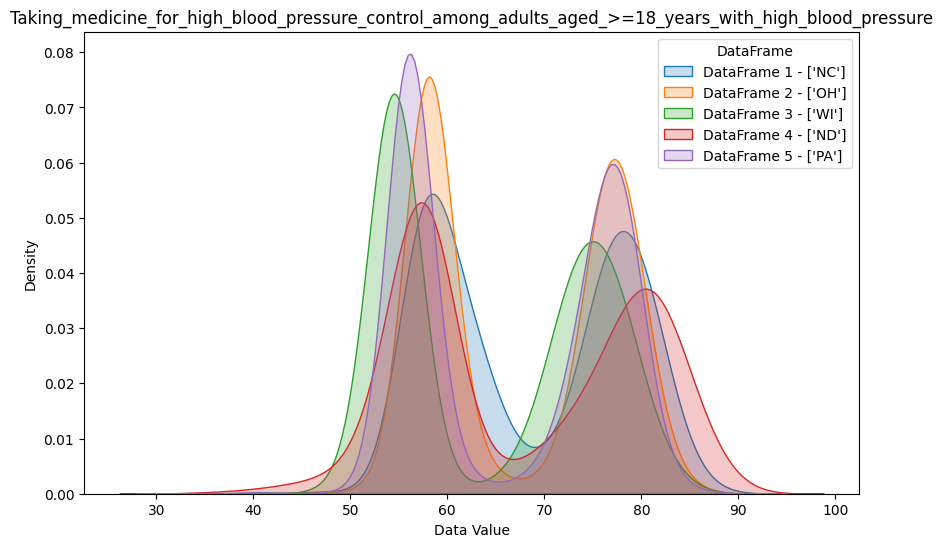

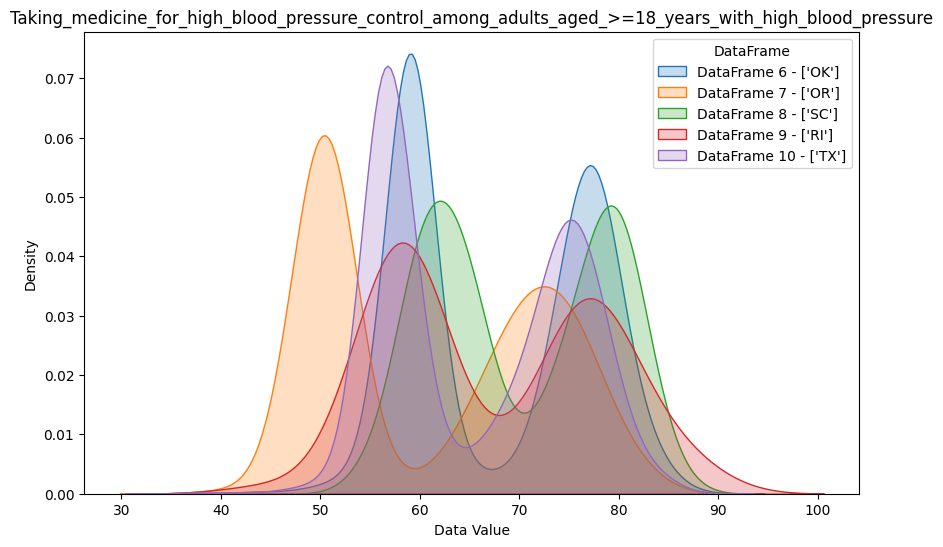

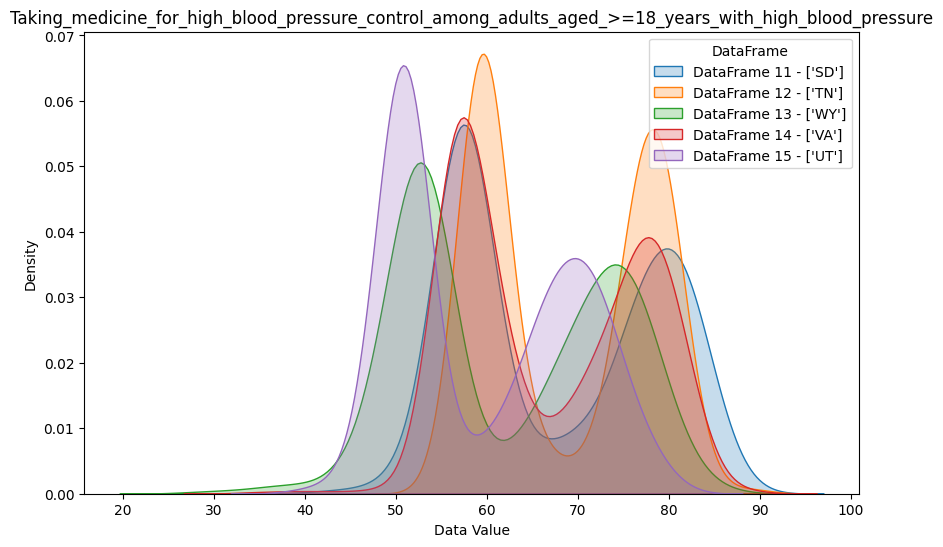

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

n = 5
lmn = list(s2020['Measure'].unique())

plt.figure(figsize=(10, 6))
abc_index = 0  # Initialize index for lmn
for j in range(n):
    dataframe_needed = dataframes_list2020_1[j]
    abc = lmn[abc_index]
    data_time = dataframe_needed.loc[dataframe_needed['Measure'] == abc, 'Data_Value']
    sns.kdeplot(data=data_time, fill=True, label=f'DataFrame {j + 1} - {dataframe_needed["StateAbbr"].unique()}')

    if j == n:
        # Increment index for abc if it's the last dataframe
        abc_index += 1

plt.legend(title='DataFrame')
plt.title(f'{abc}')
plt.xlabel('Data Value')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

n = 10
lmn = list(s2020['Measure'].unique())

plt.figure(figsize=(10, 6))
abc_index = 0  # Initialize index for lmn
for j in range(5,n):
    dataframe_needed = dataframes_list2020_1[j]
    abc = lmn[abc_index]
    data_time = dataframe_needed.loc[dataframe_needed['Measure'] == abc, 'Data_Value']
    sns.kdeplot(data=data_time, fill=True, label=f'DataFrame {j + 1} - {dataframe_needed["StateAbbr"].unique()}')

    if j == n:
        # Increment index for abc if it's the last dataframe
        abc_index += 1

plt.legend(title='DataFrame')
plt.title(f'{abc}')
plt.xlabel('Data Value')
plt.show()
n = 15
lmn = list(s2020['Measure'].unique())

plt.figure(figsize=(10, 6))
abc_index = 0  # Initialize index for lmn
for j in range(10,n):
    dataframe_needed = dataframes_list2020_1[j]
    abc = lmn[abc_index]
    data_time = dataframe_needed.loc[dataframe_needed['Measure'] == abc, 'Data_Value']
    sns.kdeplot(data=data_time, fill=True, label=f'DataFrame {j + 1} - {dataframe_needed["StateAbbr"].unique()}')

    if j == n:
        # Increment index for abc if it's the last dataframe
        abc_index += 1

plt.legend(title='DataFrame')
plt.title(f'{abc}')
plt.xlabel('Data Value')
plt.show()


# So what to do when visualization is unrealistic but we need to check out the distributions of the data so the right type of test can be applied?

Some python functions help us out here. 
distfit is a great one for example. It can determine what the best distribution fit would be for data \
This was already performed elsewhere and the results are loaded in below.

https://pypi.org/project/distfit/



In [61]:

normality_2021 = pd.read_csv('2021_data_df')
normality_2022 = pd.read_csv('2022_data_df')
normality_2020 = pd.read_csv('2020_data_df')
print(('normal',len(normality_2020[normality_2020['Best_Fit_Distribution']=='norm'])),
('not_normal',len(normality_2020[normality_2020['Best_Fit_Distribution']!='norm'])),
('normal',len(normality_2021[normality_2021['Best_Fit_Distribution']=='norm'])),
('not_normal',len(normality_2021[normality_2021['Best_Fit_Distribution']!='norm'])),
('normal',len(normality_2022[normality_2022['Best_Fit_Distribution']=='norm'])),
('not_normal',len(normality_2022[normality_2022['Best_Fit_Distribution']!='norm'])),sep='\n')

('normal', 19)
('not_normal', 1410)
('normal', 12)
('not_normal', 1497)
('normal', 13)
('not_normal', 1513)


## Since the data are overwhelmingly non-normally distributed.

We can use the Spearman's rank-order correlation.
Which is the non-parametric version of the pearson product moment correlation test. \
It helps show the strength of the relationship between two variables. 
With a -1 or a +1 denoting perfect positive or negative relationship. \
So what is needed for this analysis are all of the values that are as close to 0 as possible.


## The formula for the Spearman's rank order correlation:

$ r_s = \rho R(X),R(Y)= \frac{cov(R(X),R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}} $


$cov(R(X),R(Y)) = {\text{The covariance of the rank variables}}$ 

and p denotes the pearson correlation coefficient.

And once all of the values are obtained, the data can be filtered leaving only uncorrelated pairs of variables.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html


In [62]:




def find_my_state(states,dataframe_list):
	state = []
	x =[]
	y=[]
	n=len(dataframe_list)
	for state in states:
		state = set(state['StateAbbr'].unique())  # Get the unique state name
		for i in range(n):
			matches_2020 = dataframe_list[i]
			subseta=set(matches_2020['StateAbbr'].unique())
			if state == subseta:
				matches_texas = dataframe_list[i]
				subset1 = (matches_texas['Measure'].unique())
				subsetb=(matches_texas['StateAbbr'].unique())
			else:
				i +=1
		for i in range(n):
			not_texas = dataframe_list[i] # Otherwise iterate over everything
			subsetc = (not_texas['StateAbbr'].unique())
			subset2 = (not_texas['Measure'].unique())
			
			intersection_of_measures = set(subset1).intersection(set(subset2)) # now the intersection of all 2	
			intersection_list = list(intersection_of_measures)

			for i in intersection_list:
				y.append([i])
				lis1 = matches_texas.loc[matches_texas['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
				lis2 = not_texas.loc[not_texas['Measure']==i,'Data_Value']
				if len(lis1) != len(lis2):
					min_len = (min(len(lis1), len(lis2)))
					
					if len(lis1) == min_len:
				
						lis2= random.sample(list(lis2), min_len) # Random sample does not use replacement and also makes sure the shorter list length is used
						
					if len(lis2) == min_len:
						lis1= random.sample(list(lis1), min_len)
					else:
						continue

					x.append([subsetb,subsetc,stats.spearmanr(lis1, lis2),i])
	return x


The below code takes a list of the dataframes, and the function. And outputs the filtered p values and such.

In [63]:
list_of_states = [TX,CA,PA]
yay=find_my_state(list_of_states,dataframes_list2020)

In [64]:
list_of_states = [TX,CA,PA]
yay1=find_my_state(list_of_states,dataframes_list2021)

In [65]:
list_of_states = [TX,CA,PA]
yay2=find_my_state(list_of_states,dataframes_list2022)

In [66]:
# This code makes the needed df for all specific variables. And cleans up. And filters. 
df1=pd.DataFrame()
def now_make_dataframes(xm):
	df1 = pd.DataFrame(xm)
	df1['state'] = df1[0]+df1[1]
	df1['state'] = df1['state'].astype(str)
	df1['result_string'] = df1[2].astype(str) # gotta change the kurkwalis to string
	df1['Corr'] = df1['result_string'].str.extract(r'statistic=([0-9.-]+)').astype(float) # Then just regex it away
	df1['p-value'] = df1['result_string'].str.extract(r'pvalue=([0-9.eE+-]+)').astype(float)
	df1['State1'] = df1[0].astype(str).str.extractall(r'\'([A-Z]{2})\'').groupby(level=0).apply(lambda x: ','.join(x[0]))
	df1['State2'] = df1[1].astype(str).str.extractall(r'\'([A-Z]{2})\'').groupby(level=0).apply(lambda x: ','.join(x[0]))
	df1['p-value'] = df1['p-value'].astype(float).apply(lambda x: '{:.10f}'.format(x) if pd.notna(x) else '')
	df1['p-value'] = pd.to_numeric(df1['p-value'], errors='coerce') # Convert P value to numeric
	df1['Measure'] = df1[3]
	df1= df1.drop(['result_string',0,1,2,3],axis=1)
	empty_rows = df1[df1.isna().any(axis=1)]
	df1 = df1[~df1.index.isin(empty_rows.index)] # Use boolean indexing to get rid of all of the empty values 
	filtered_df = df1[df1['Corr'] < 0.5]
	filtered_df1 = filtered_df[filtered_df["Corr"]>-0.5]
	return filtered_df1


In [67]:
filtered_df1=now_make_dataframes(yay)

In [68]:
filtered_df1.head(1)

,state,Corr,p-value,State1,State2,Measure
0,['TXNC'],-0.000143,0.995653,TX,NC,Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure


In [69]:
filtered_df2=now_make_dataframes(yay1)

In [70]:
filtered_df2.head(1)

,state,Corr,p-value,State1,State2,Measure
0,['TXND'],0.016501,0.691438,TX,ND,Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure


In [71]:
filtered_df3=now_make_dataframes(yay2)

In [72]:
len(filtered_df1)

4106

In [93]:
len(filtered_df2)

4284

In [94]:
len(filtered_df3)

4374

Checking below if there are any duplicates

In [73]:
duplicates10 = filtered_df1[filtered_df1.duplicated(['Measure','state'])]

In [74]:
duplicates10

,state,Corr,p-value,State1,State2,Measure


In [75]:
duplicates10 = filtered_df2[filtered_df2.duplicated(['Measure','state'])]
duplicates10

,state,Corr,p-value,State1,State2,Measure


In [76]:
duplicates10 = filtered_df3[filtered_df3.duplicated(['Measure','state'])]
duplicates10

,state,Corr,p-value,State1,State2,Measure


No duplicates is a good sign. 

# So the above value can be used to select all of the State combinations that pass correlation test and visualize them

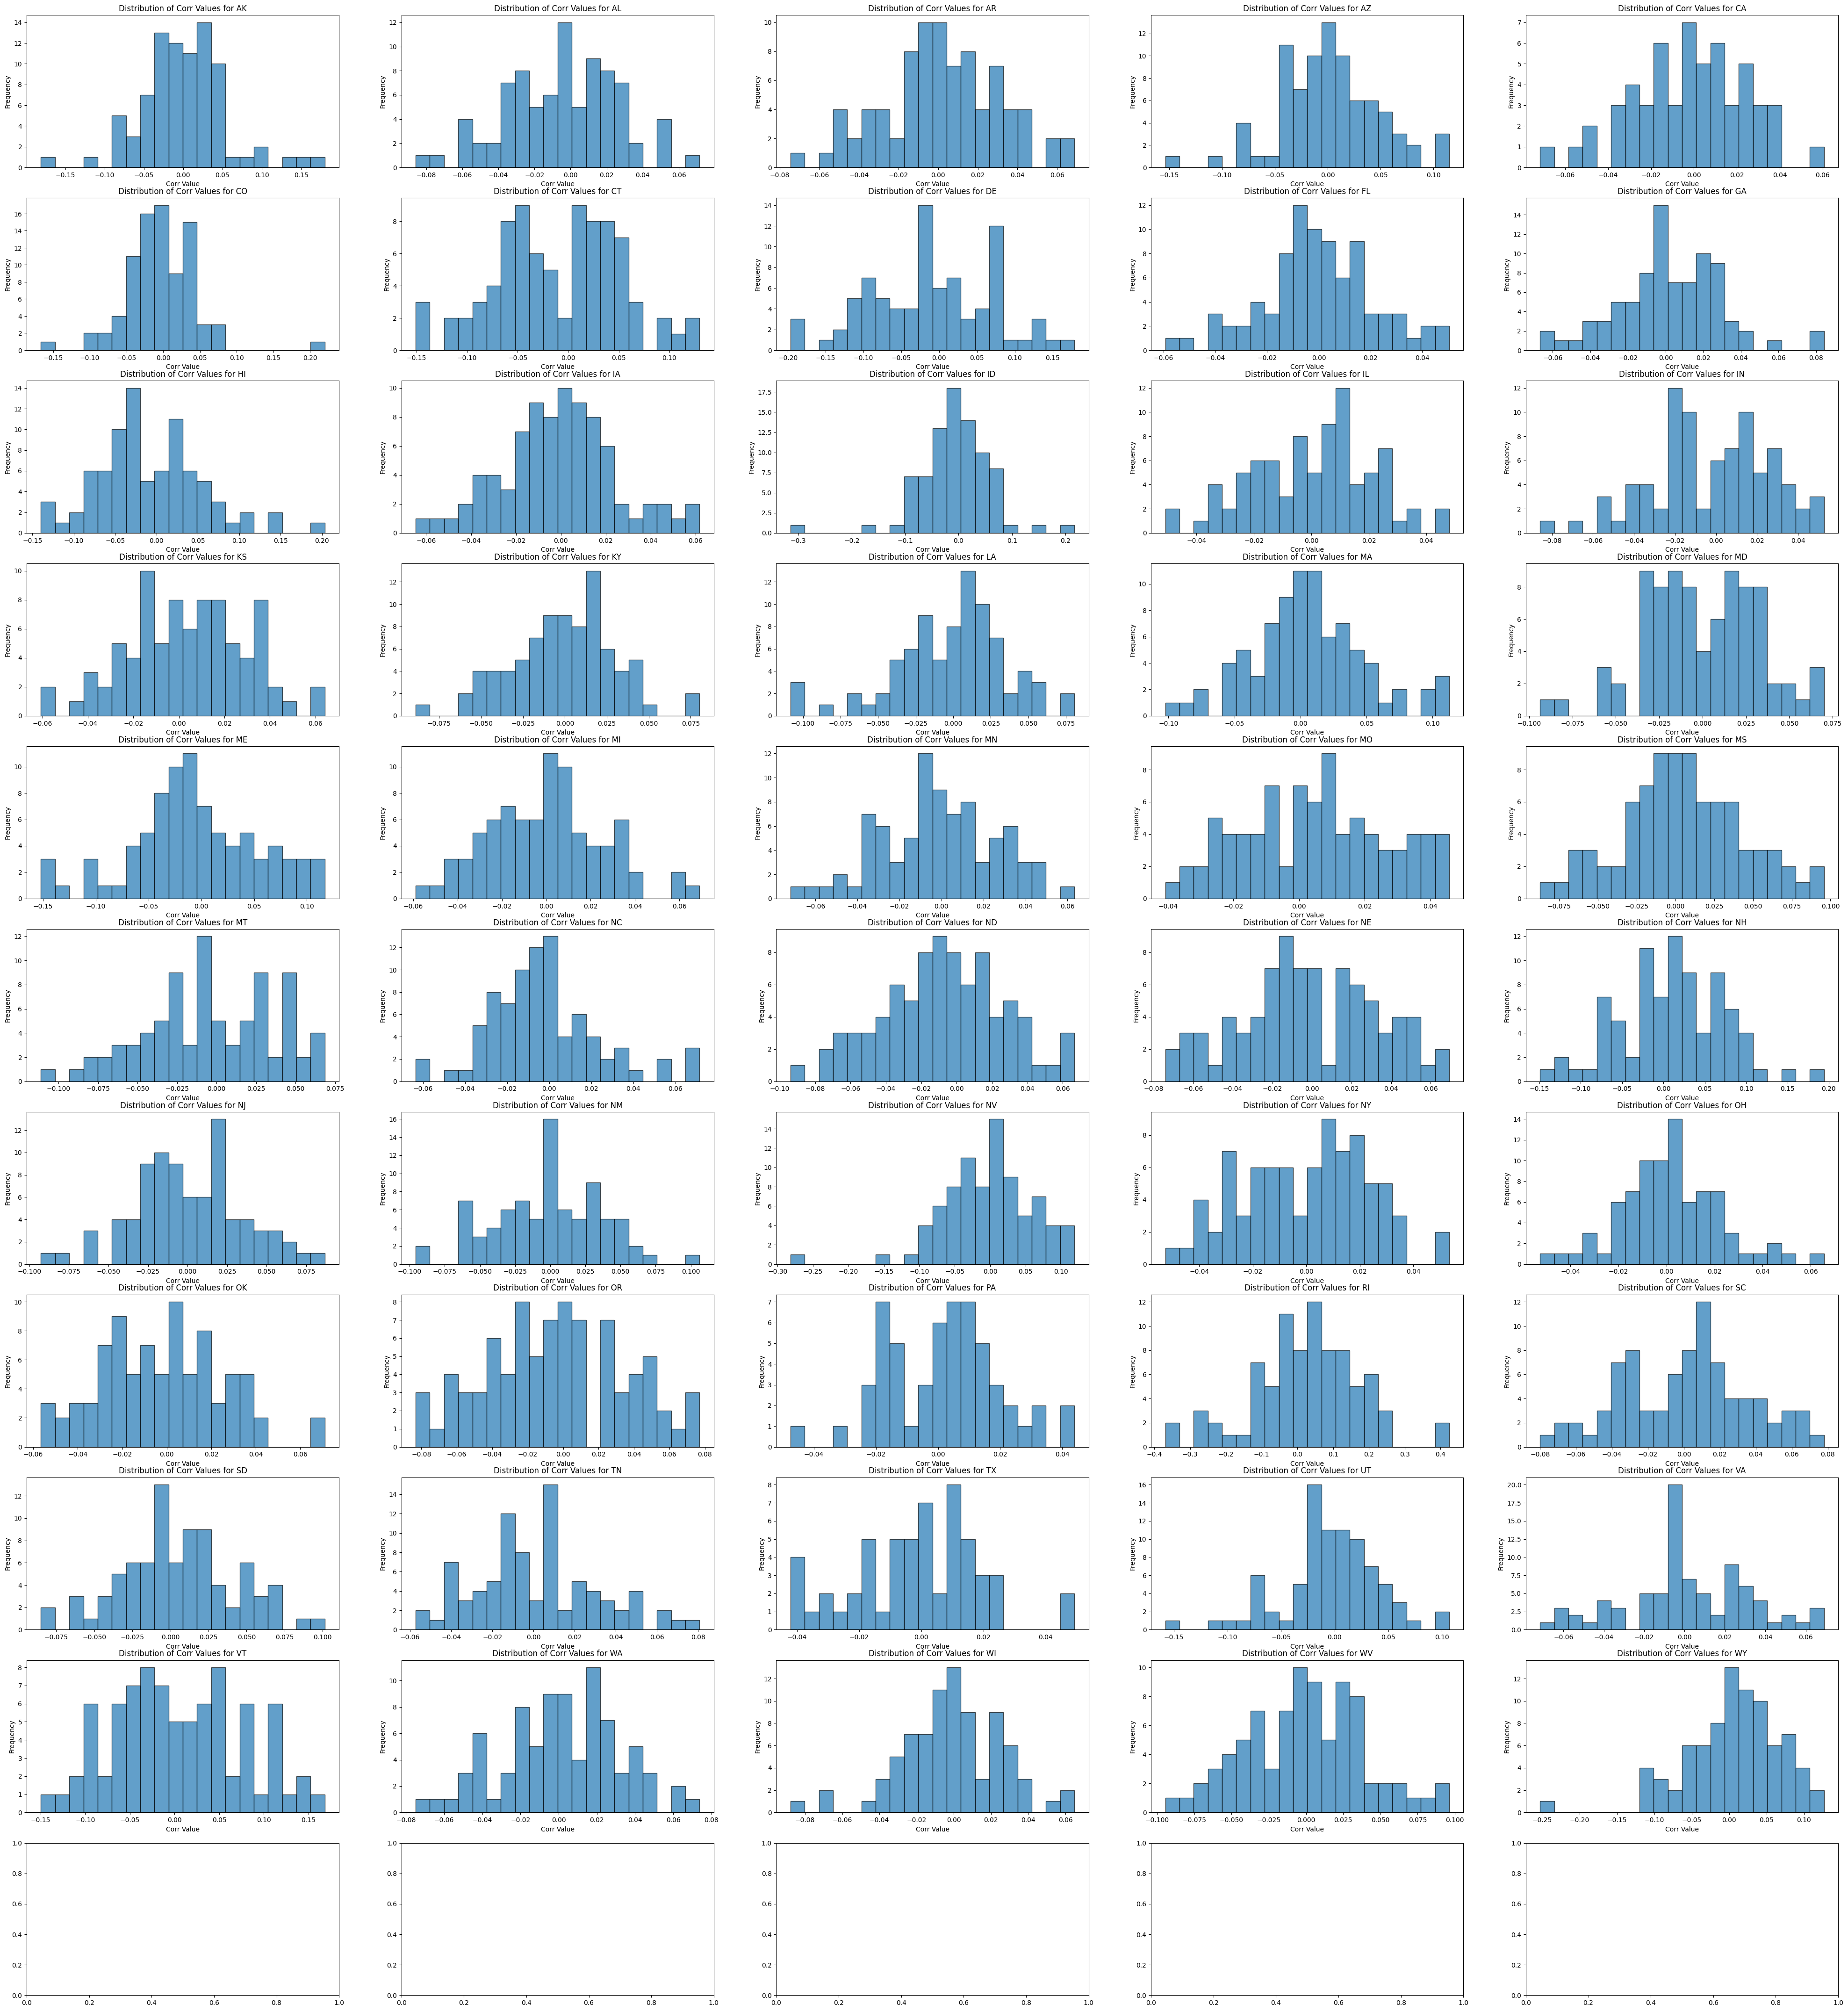

In [77]:
grouped = filtered_df1.groupby('State2') # So group each by state
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 55))  # Adjust figsize as needed

for i, (state, group) in enumerate(grouped):
    ax = axes[i // 5, i % 5]  # Calculate the correct subplot based on row and column ( a 10 by 5 basically with extra steps)
    ax.hist(group['Corr'], bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribution of Corr Values for {state}')
    ax.set_xlabel('Corr Value')
    ax.set_ylabel('Frequency')


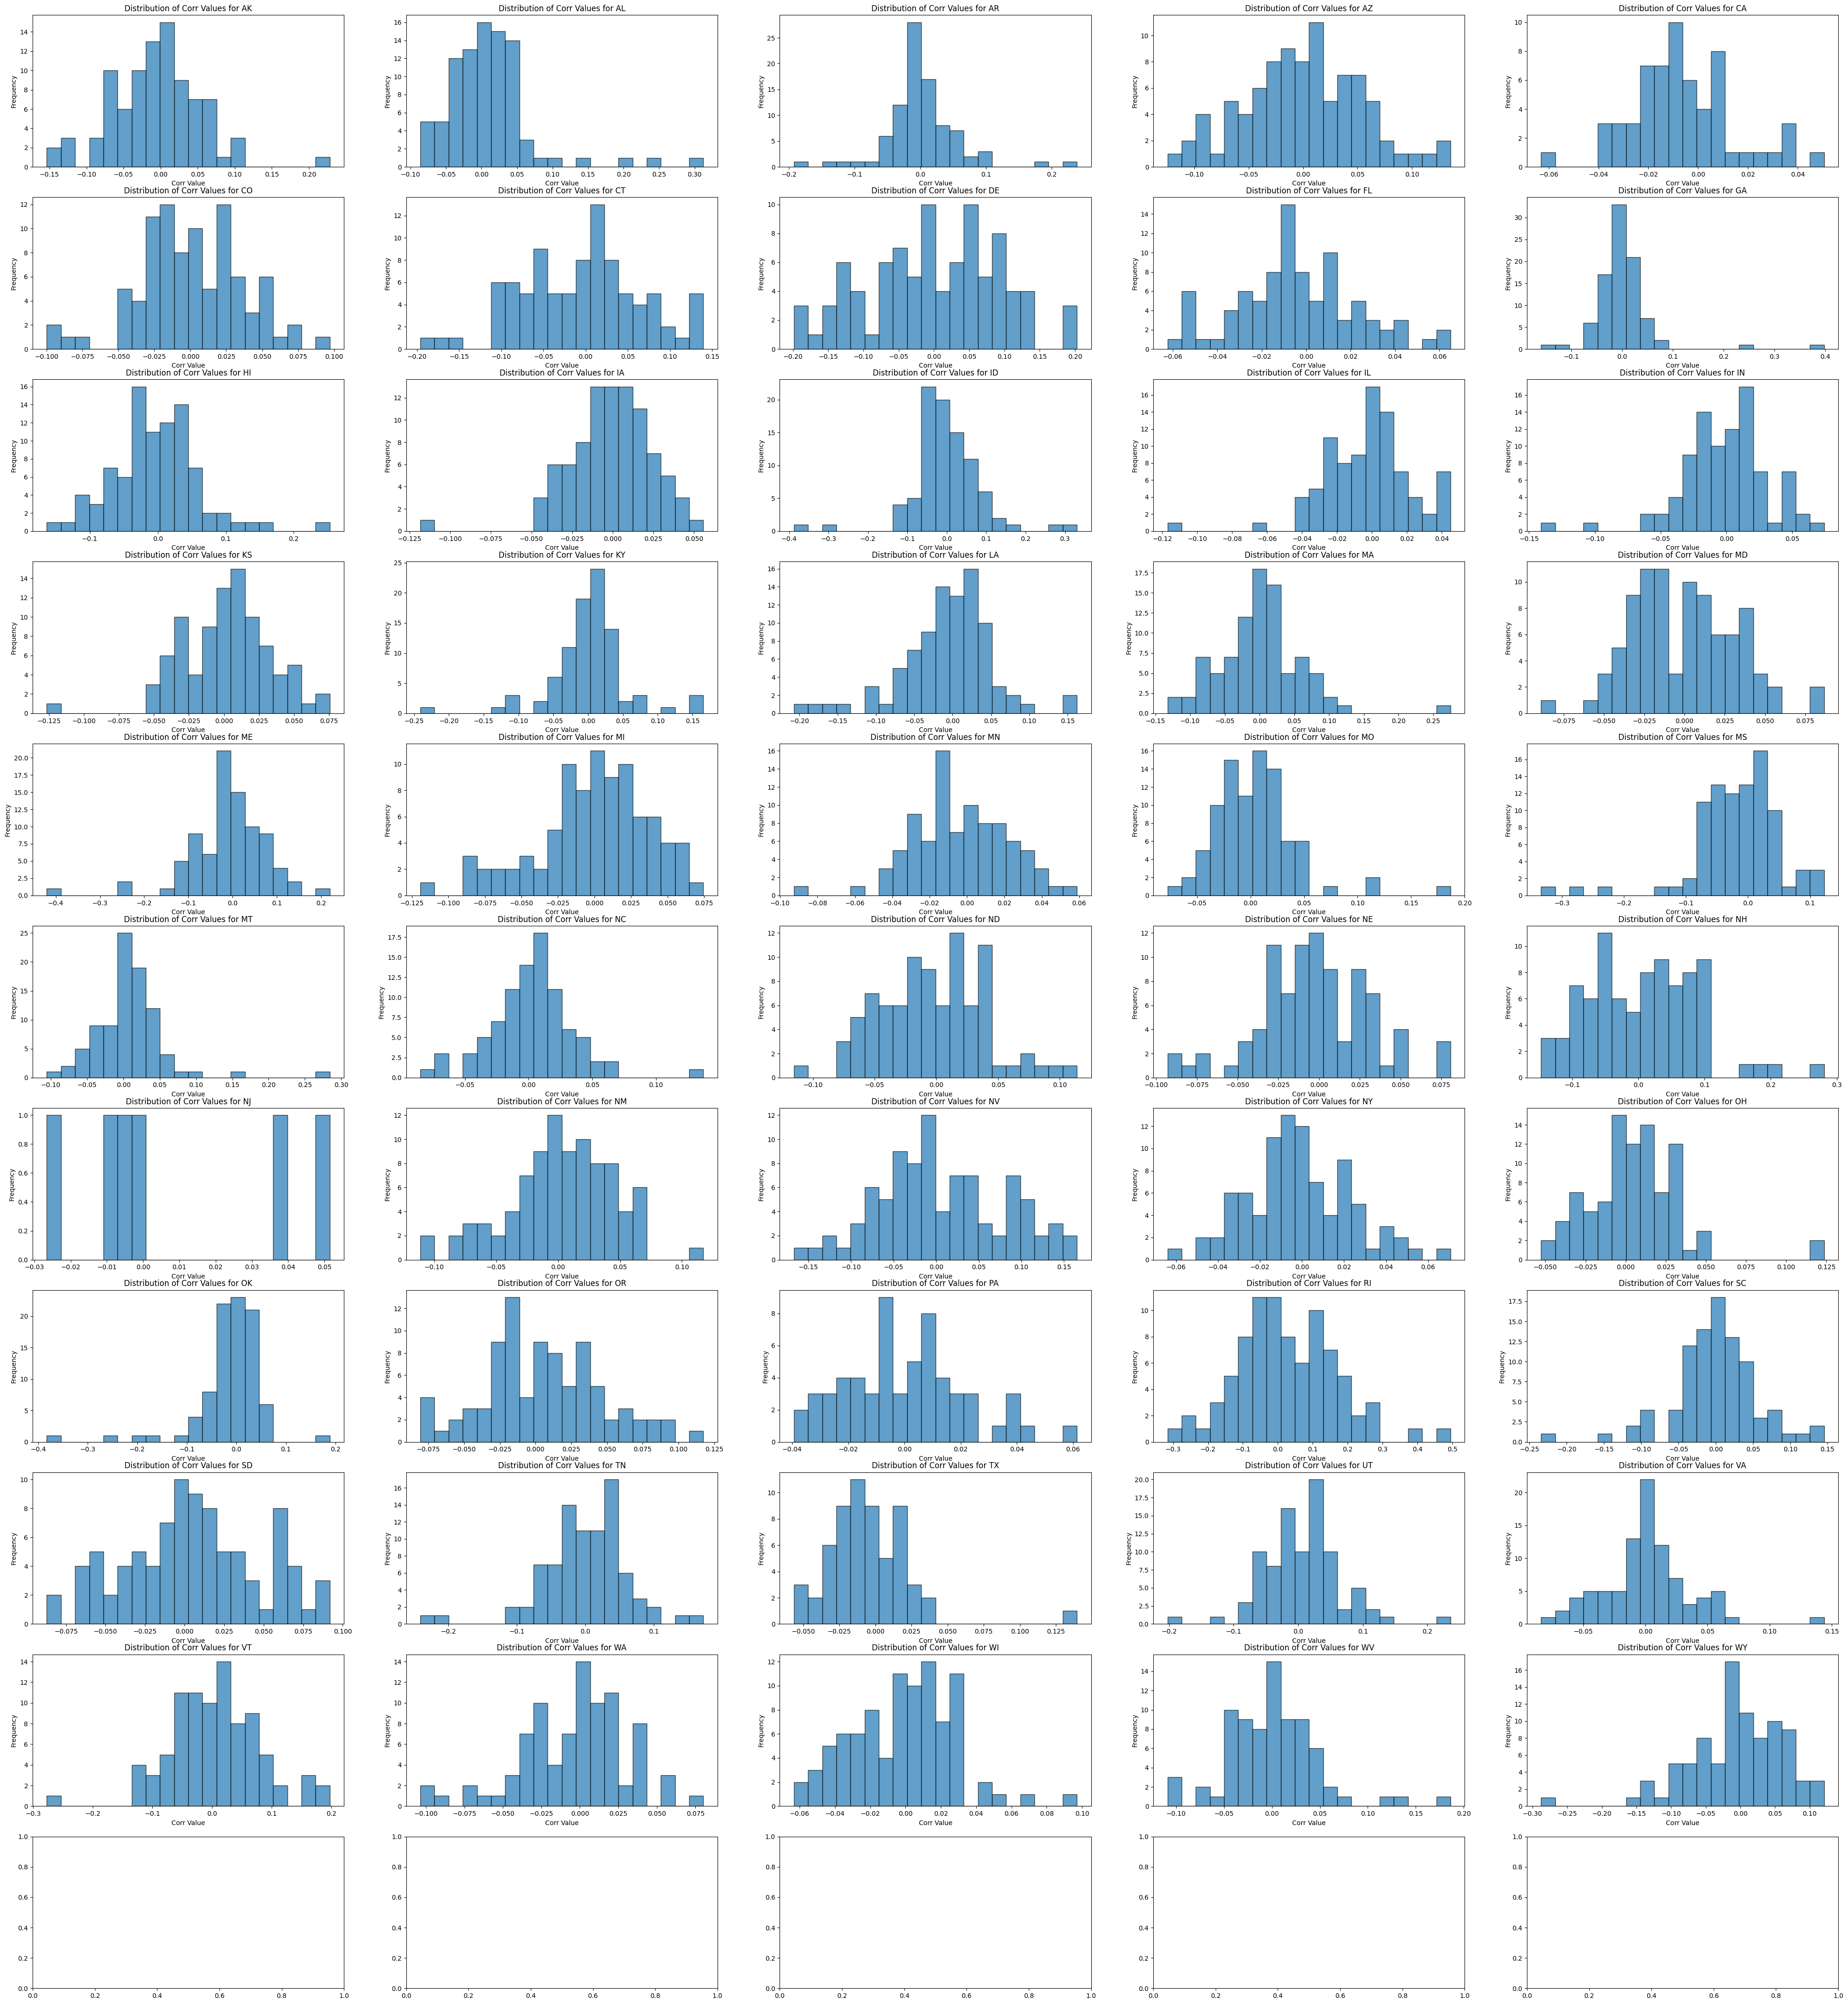

In [78]:
grouped = filtered_df2.groupby('State2') # So group each by state
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 55))  # Adjust figsize as needed

for i, (state, group) in enumerate(grouped):
    ax = axes[i // 5, i % 5]  # Calculate the correct subplot based on row and column ( a 10 by 5 basically with extra steps)
    ax.hist(group['Corr'], bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribution of Corr Values for {state}')
    ax.set_xlabel('Corr Value')
    ax.set_ylabel('Frequency')

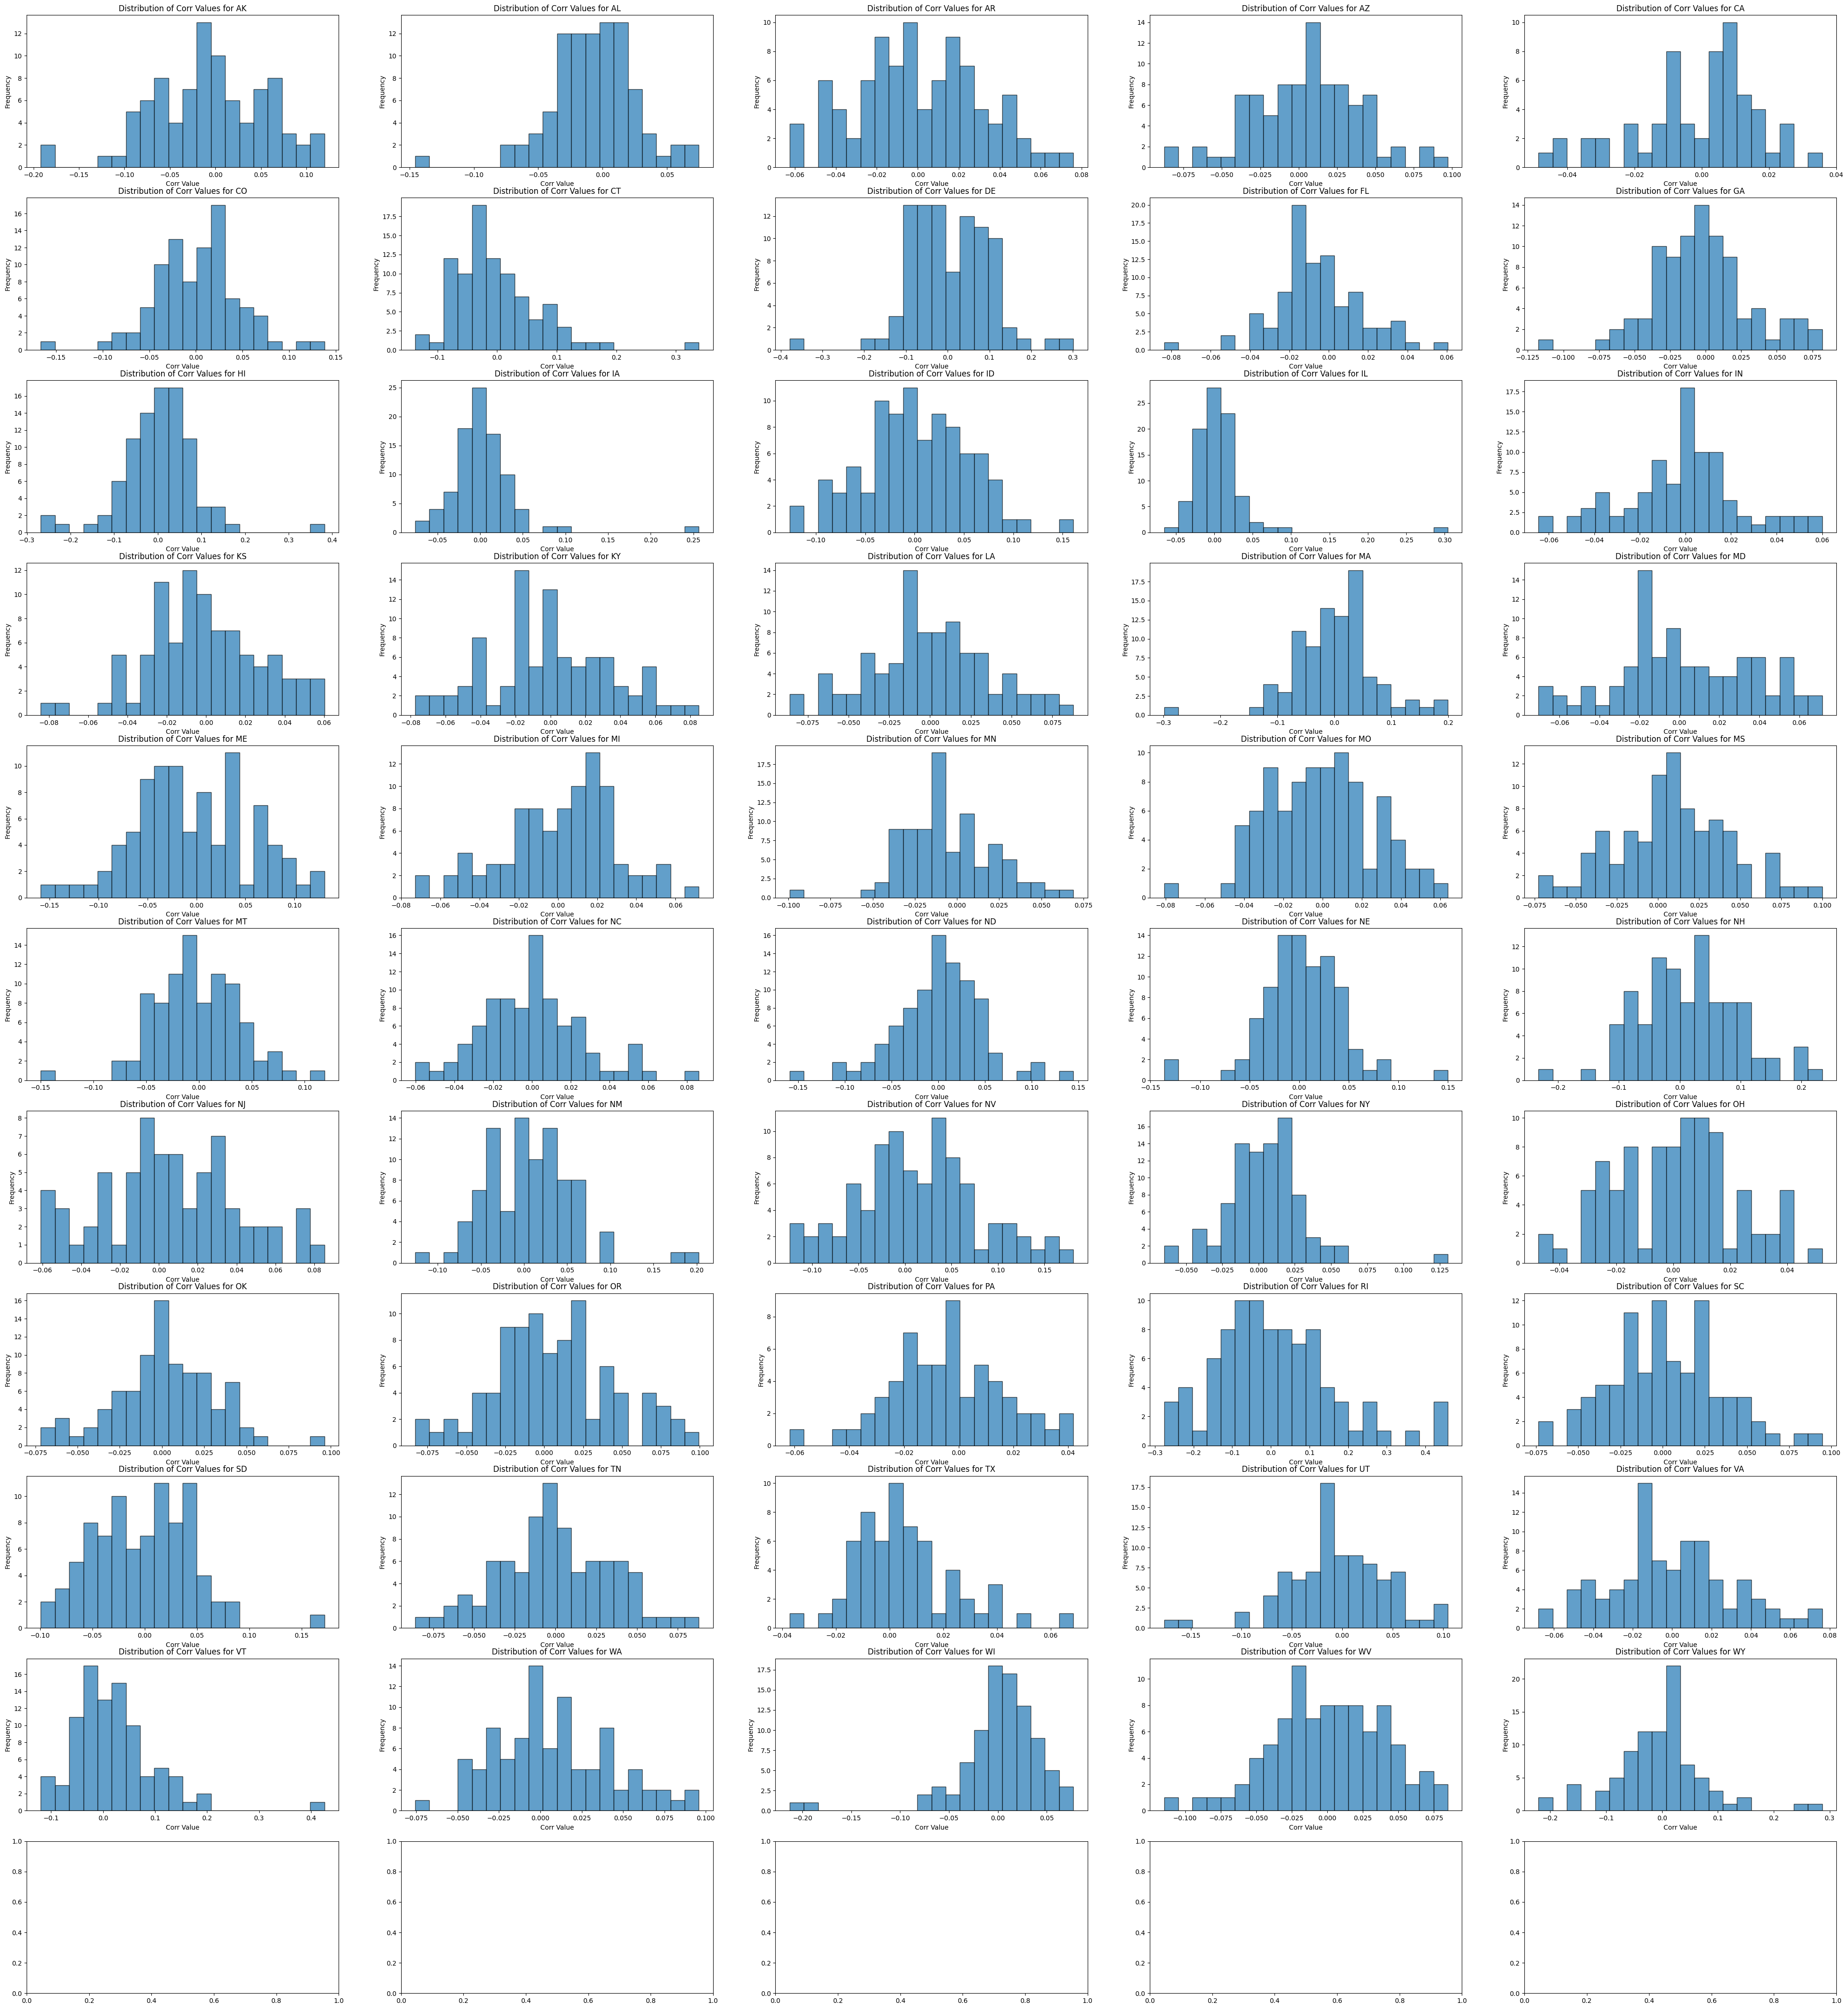

In [79]:
grouped = filtered_df3.groupby('State2') # So group each by state
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 55))  # Adjust figsize as needed

for i, (state, group) in enumerate(grouped):
    ax = axes[i // 5, i % 5]  # Calculate the correct subplot based on row and column ( a 10 by 5 basically with extra steps)
    ax.hist(group['Corr'], bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribution of Corr Values for {state}')
    ax.set_xlabel('Corr Value')
    ax.set_ylabel('Frequency')

# So given the original question: Do states with more places data have different metrics in general?


The null hypothesis is:
$H_0$ :$\mu_1-\mu_2 =0$ 

The alternative hypothesis is:
$H_0$ :$\mu_1-\mu_2 \neq0 $ 

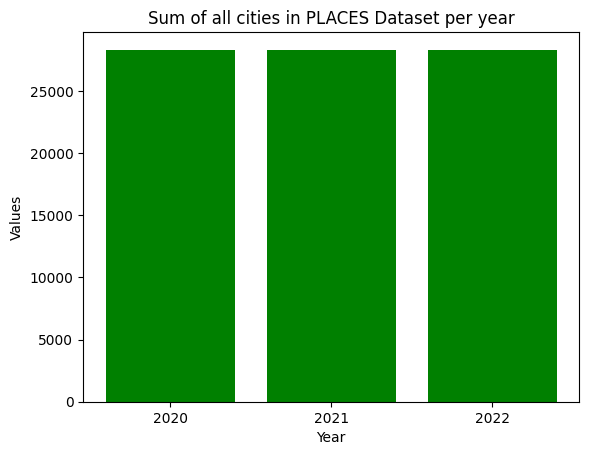

In [80]:
# Not sure why I have this barplot any more the values are the same
years = ['2020', '2021', '2022']
values = [28329, 28329, 28329]


plt.bar(years, values, color='green')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Sum of all cities in PLACES Dataset per year')


plt.show()

In [81]:
city_counts1 = s2020.groupby('StateAbbr')['LocationName'].nunique()
city_counts1 = city_counts1.sort_values(ascending=False)
city_counts2 = s2021.groupby('StateAbbr')['LocationName'].nunique()
city_counts2 = city_counts2.sort_values(ascending=False)
city_counts3 = s2022.groupby('StateAbbr')['LocationName'].nunique()
city_counts3 = city_counts3.sort_values(ascending=False)

In [82]:
city_counts1['CA']

1455

In [83]:
city_counts1['PA']

1718

In [84]:
city_counts1['TX']

1667

The plots for Locations per year do not change very much between each data set.
They are visualized below.

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Number of locations '),
 Text(0.5, 1.0, 'Locations per State 2017-2018')]

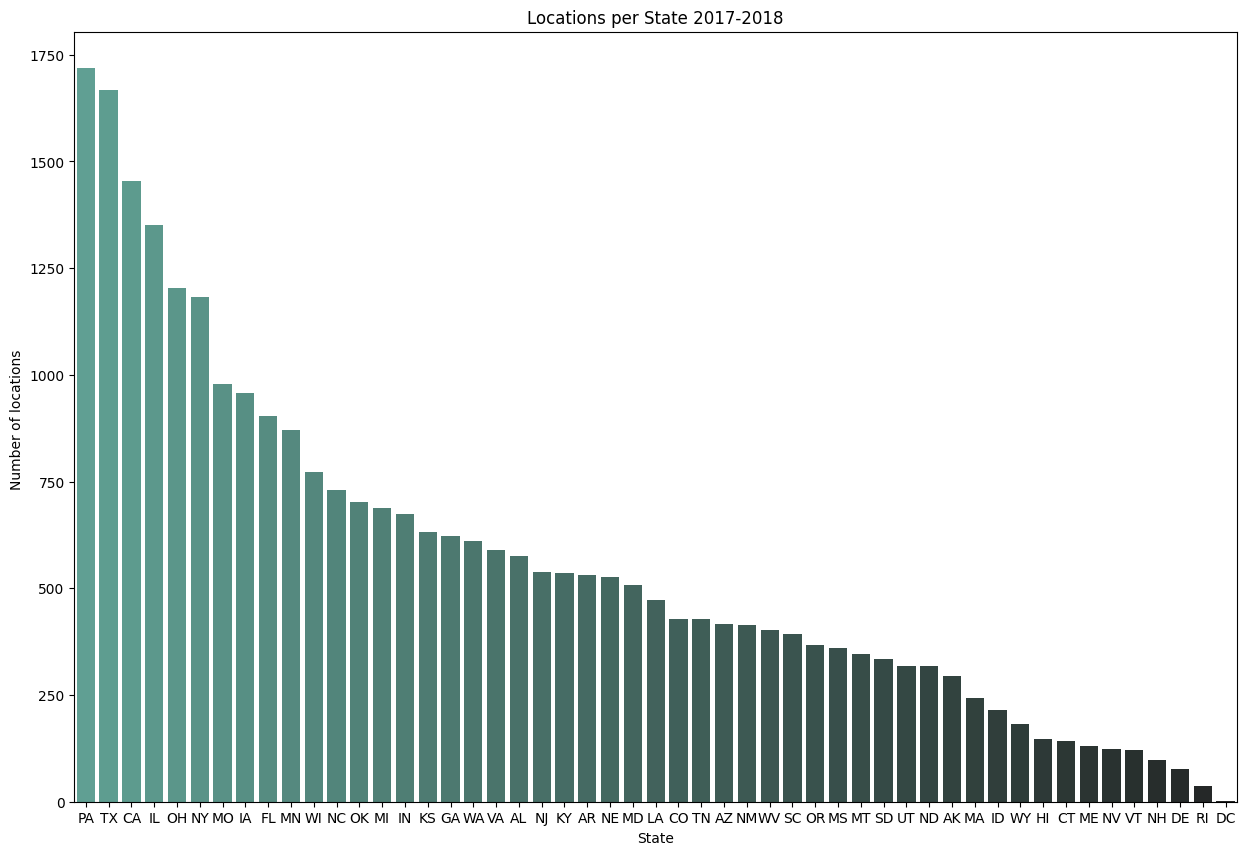

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(city_counts1,palette="dark:#5A9_r")


ax.set(xlabel="State",ylabel ="Number of locations ",title="Locations per State 2017-2018")

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Number of locations '),
 Text(0.5, 1.0, 'Locations per State 2019-2020')]

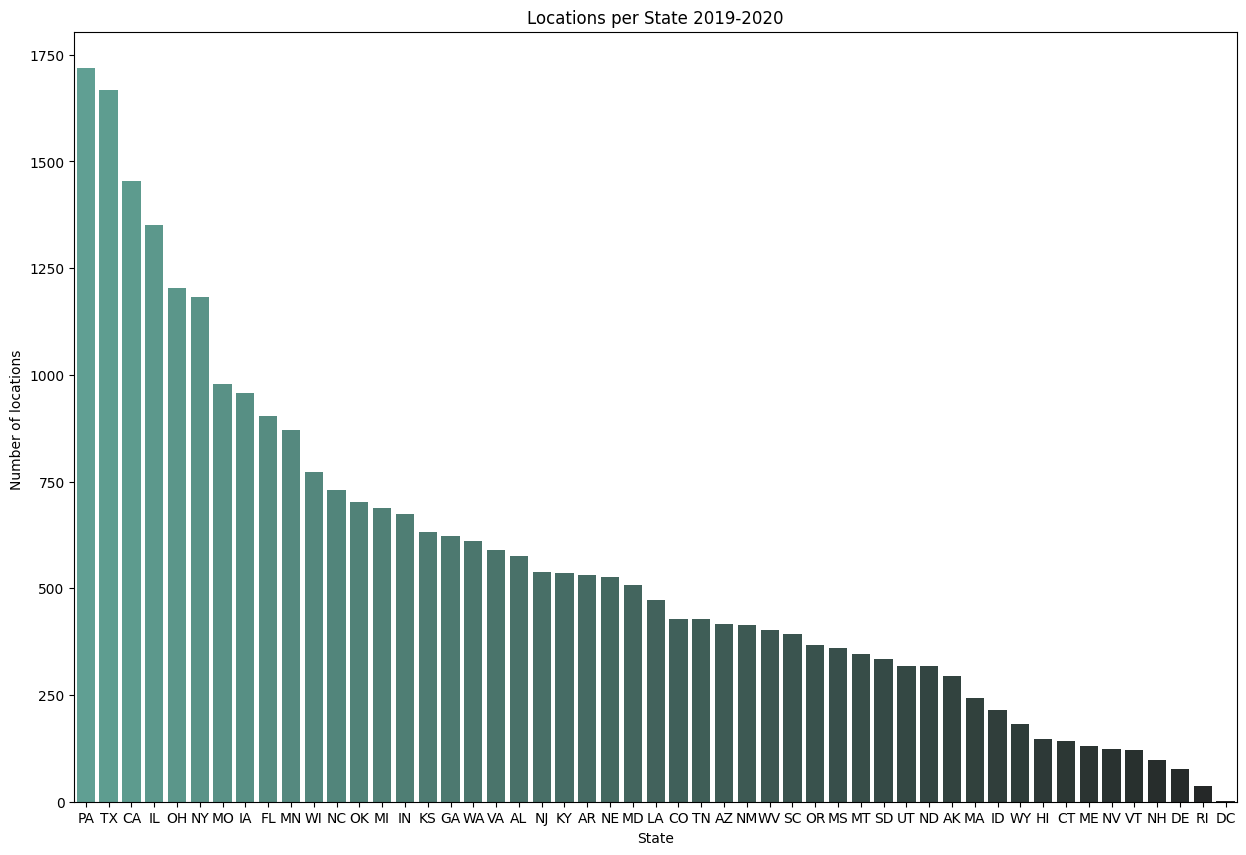

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(city_counts2,palette="dark:#5A9_r")

ax.set(xlabel="State",ylabel ="Number of locations ",title="Locations per State 2019-2020")

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Number of locations '),
 Text(0.5, 1.0, 'Locations per State 2020-2021')]

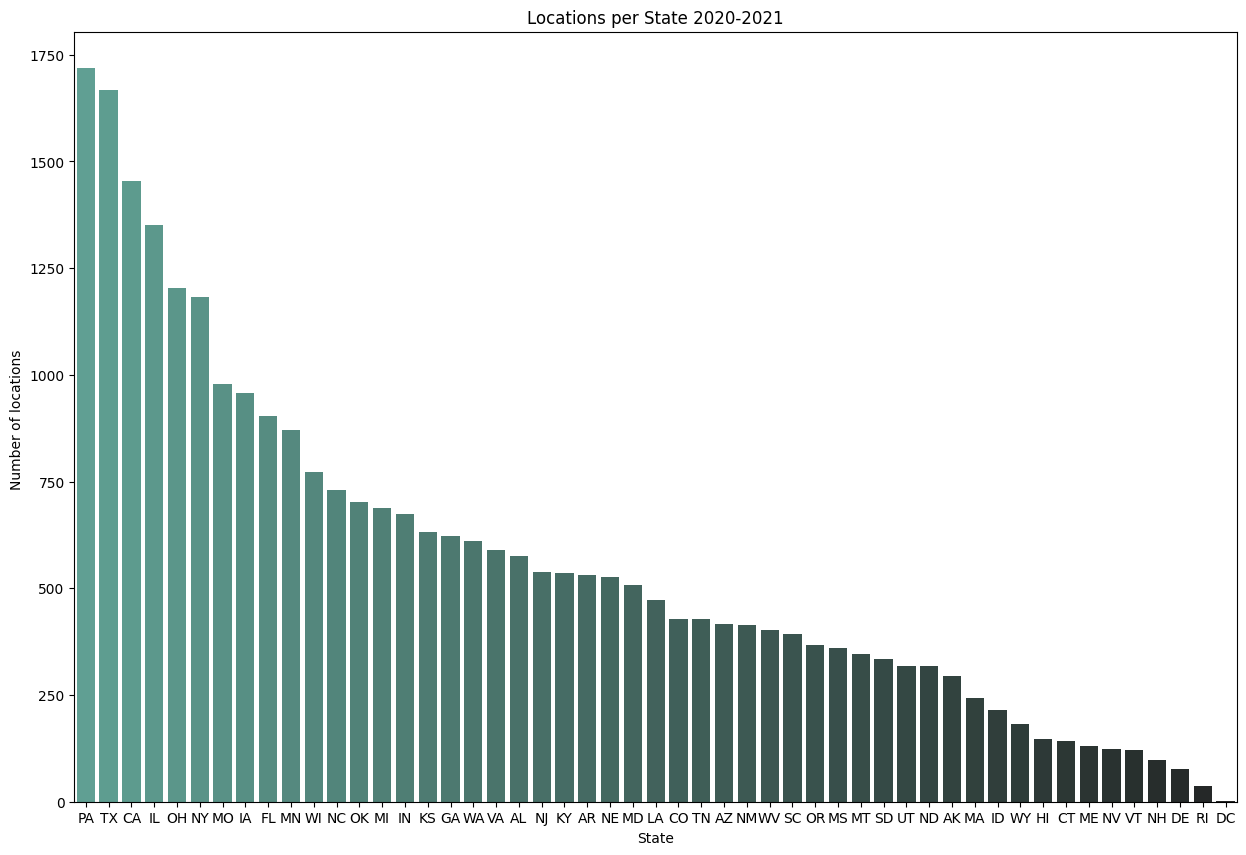

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(city_counts3,palette="dark:#5A9_r")

ax.set(xlabel="State",ylabel ="Number of locations ",title="Locations per State 2020-2021")

## Kruskal-Wallis H Test 

The Kruskal-Wallis H-test tests whether the null hypothesis that the population medians or means of all of groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.*


The test statistic is calculated using the below formula:

$ H = \frac{12}{n(n+1)} \sum_{i=1}^{k} \frac{R^2}{n_i} -3(n-1)$


Where _ni_ is the sample size for each of groups (1,2,3...k) from 1 to k. Then the rank is computed (Ri), \
The resulting statistic is similiar to a chi-squared distribution with k-1 degrees of freedom.\
If the p value is less than alpha which is 0.05, we reject the null hypothesis. That the means/medians of the states\
with more places data differ from other states. **


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html * \
https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/kruskwal.htm **


For the code below. I take each state index, match the same states in the other dataframes and then run all stats kruskal tests on the variables. This test can also take in arrays of different lengths so I commented out the random sampling to make them the same. 
I need to see if the medians of the groups are rejected more for the cities with more places data than others. Over years. 

In [88]:
filtered_df1.head(1)

,state,Corr,p-value,State1,State2,Measure
0,['TXNC'],-0.000143,0.995653,TX,NC,Taking_medicine_for_high_blood_pressure_control_among_adults_aged_>=18_years_with_high_blood_pressure


In [89]:
def run_kruskal(states,dataframe_list):
	state = []
	x =[]
	y=[]
	n=len(dataframe_list)
	for state in states:
		state = set(state['StateAbbr'].unique())  # Get the unique state name
		for i in range(n):
			matches_2020 = dataframe_list[i]
			subseta=set(matches_2020['StateAbbr'].unique())
			if state == subseta:
				matches_texas = dataframe_list[i]
				subset1 = (matches_texas['Measure'].unique())
				subsetb=(matches_texas['StateAbbr'].unique())
			else:
				i +=1
		for i in range(n):
			not_texas = dataframe_list[i] # Otherwise iterate over everything
			subsetc = (not_texas['StateAbbr'].unique())
			subset2 = (not_texas['Measure'].unique())
			
			intersection_of_measures = set(subset1).intersection(set(subset2)) # now the intersection of all 2	
			intersection_list = list(intersection_of_measures)

			for i in intersection_list:
				y.append([i])
				lis1 = matches_texas.loc[matches_texas['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
				lis2 = not_texas.loc[not_texas['Measure']==i,'Data_Value']
				#if len(lis1) != len(lis2):
					#min_len = (min(len(lis1), len(lis2)))
					
					#if len(lis1) == min_len:
				
						#lis2= random.sample(list(lis2), min_len) # Random sample does not use replacement and also makes sure the shorter list length is used
						
					#if len(lis2) == min_len:
						#lis1= random.sample(list(lis1), min_len)
					#else:
						#continue

				x.append([subsetb,subsetc,stats.stats.kruskal(lis1, lis2),i])
	return x

In [90]:
states_list_1 = [TX,PA,CA]
yay5=run_kruskal(states_list_1,dataframes_list2020)

In [91]:
states_list_2 = [TX,PA,CA]
yay6=run_kruskal(states_list_2,dataframes_list2021)

In [92]:
states_list_3 = [TX,PA,CA]
yay7=run_kruskal(states_list_3,dataframes_list2022)

KeyboardInterrupt: 

In [ ]:
yay5[0]

In [ ]:
# This code makes the needed df for all specific variables. And cleans up. And filters. 
df1=pd.DataFrame()
def now_make_dataframes(xm):
	df1 = pd.DataFrame(xm)
	df1['state'] = df1[0]+df1[1]
	df1['state'] = df1['state'].astype(str)
	df1['result_string'] = df1[2].astype(str) # gotta change the kurkwalis to string
	df1['Statistic'] = df1['result_string'].str.extract(r'statistic=([0-9.-]+)').astype(float) # Then just regex it away
	df1['p-value'] = df1['result_string'].str.extract(r'pvalue=([0-9.eE+-]+)').astype(float)
	df1['State1'] = df1[0].astype(str).str.extractall(r'\'([A-Z]{2})\'').groupby(level=0).apply(lambda x: ','.join(x[0]))
	df1['State2'] = df1[1].astype(str).str.extractall(r'\'([A-Z]{2})\'').groupby(level=0).apply(lambda x: ','.join(x[0]))
	df1['p-value'] = df1['p-value'].astype(float).apply(lambda x: '{:.10f}'.format(x) if pd.notna(x) else '')
	df1['p-value'] = pd.to_numeric(df1['p-value'], errors='coerce') # Convert P value to numeric
	df1['Measure'] = df1[3]
	df1= df1.drop(['result_string',0,1,2,3],axis=1)
	empty_rows = df1[df1.isna().any(axis=1)]
	df1 = df1[~df1.index.isin(empty_rows.index)] # Use boolean indexing to get rid of all of the empty values 
	return df1


In [ ]:
filtered_df_kruskal_2020=now_make_dataframes(yay5)

In [ ]:
filtered_df_kruskal_2021=now_make_dataframes(yay6)

In [ ]:
filtered_df_kruskal_2022=now_make_dataframes(yay7)

In [ ]:
shorted_df1 = filtered_df1.drop(columns=['Corr','p-value','State1','State2'],axis=1)
shorted_df2 = filtered_df2.drop(columns=['Corr','p-value','State1','State2'],axis=1)
shorted_df3 = filtered_df3.drop(columns=['Corr','p-value','State1','State2'],axis=1)

In [ ]:
len(shorted_df2)

In [ ]:
result_2020_kruskal = filtered_df_kruskal_2020.merge(shorted_df1, how='inner', on=['Measure','state'])
len(result_2020_kruskal)

In [ ]:
result_2021_kruskal = filtered_df_kruskal_2021.merge(shorted_df2, how='inner', on=['Measure','state'])
len(result_2021_kruskal)

In [ ]:
result_2022_kruskal = filtered_df_kruskal_2022.merge(shorted_df3, how='inner', on=['Measure','state'])
len(result_2022_kruskal)

In [ ]:
filtered_df3.head(1)


So to see if Texas for example differed more than any other state, I need to sum all of the times texas occurs and then sum all of the other states. The above filtered DF is where there is a difference from the median. And if texas occurs more, then.. it occurs more. It does not answer the question on if the data is higher or lower. Just that a difference exists.

In [ ]:
len(filtered_df1[filtered_df1['p-value']<0.05])

In [ ]:
len(filtered_df1[filtered_df1['p-value']>0.05])

In [ ]:
len(filtered_df2[filtered_df2['p-value']<0.05])

In [ ]:
len(filtered_df2[filtered_df2['p-value']>0.05])

In [ ]:
len(filtered_df3[filtered_df3['p-value']<0.05])

In [ ]:
len(filtered_df3[filtered_df3['p-value']>0.05])

There are many no values but enough yes values to warrant post hoc analysis

# Start of the Dunn test 

The Dunn test will tell us which values differ based on pairs. \
It is a post hoc analysis often performed after and\
using the mean rankings of the outcome of the Kruskal-Wallis test.




In [ ]:
list_of_measures_k=list(s2022['Measure'].unique())

In [ ]:
#filtered_df_kruskal_2020.head(1)
states=[CA,PA,TX]
n=len(dataframes_list2022)
x=[]
b=[]
r=[]
for k in list_of_measures_k:
	result1 = s2020[s2020['Measure'] == k]
	for state in states:
		state = set(state['StateAbbr'].unique())  # Get the unique state name
		for i in range(n):
			matches_2020 = dataframes_list2020[i]
			subseta=set(matches_2020['StateAbbr'].unique())
			if state == subseta:
				matches_texas = dataframes_list2020[i]
				subset1 = (matches_texas['Measure'].unique())
				subsetb=(matches_texas['StateAbbr'].unique())
			else:
				i +=1
		for i in range(n):
			not_texas = dataframes_list2020[i] # Otherwise iterate over everything
			subsetc = (not_texas['StateAbbr'].unique())
			subset2 = (not_texas['Measure'].unique())
			
			intersection_of_measures = set(subset1).intersection(set(subset2)) # now the intersection of all 2	
			intersection_list = list(intersection_of_measures)
			for i in intersection_list:
				y.append([i])
				lis1 = matches_texas.loc[matches_texas['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
				lis2 = not_texas.loc[not_texas['Measure']==i,'Data_Value']
				if len(lis1) != len(lis2):
					min_len = (min(len(lis1), len(lis2)))
					
					if len(lis1) == min_len:
				
						lis2= random.sample(list(lis2), min_len) # Random sample does not use replacement and also makes sure the shorter list length is used
						
					if len(lis2) == min_len:
						lis1= random.sample(list(lis1), min_len)
					else:
						continue
			data=[lis1,lis2]
			r.append(subsetc)
			z=sp.posthoc_dunn(data,p_adjust = 'bonferroni')
			b.append(z)

In [ ]:
okay=[]
for i in range(len(b)):
    okay.append(b[i][2])

In [ ]:
woo=pd.DataFrame(okay)
woo['states']=r

The results of my testing are below:

In [ ]:
len(woo[woo[1]<0.05])

In [ ]:
len(woo[woo[1]>0.05])

# Updated Hypothesis

So using the above code and visualizing it. It is easy to see that overall States with more PLACES locations\
differ from the mean/median when using pairwise post-hoc analysis. Which is not the most clear conclusion.\
Given these results, it might be a good idea to perform some other testing. And the hypothesis will now change slightly.
Maybe a more specific type of question will yield better answers.
Do the states with more PLACES locations have higher means in terms of Measure results than States with fewer datapoints?

So the new hypothesis is \
$H_0$ :$\mu_1-\mu_2 =0$ \
No difference in the means. 

Or

$H_1$ :$\mu_1-\mu_2 >0 $ \
Meaning that the states with more PLACES data have higher metrics. 



# It seems a parametric set of tests will be required after all. 
But how can parametric tests be used on this data?
With large enough sample sizes (> 30 or 40), the violation of the normality assumption should not cause major problems * \
And each sample size is a few hundred. So all measures and States satisfy this rule. \
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/*


# Levene's Test
Going to use the Levene test to see if samples come from equal variance distributions.
If the resulting p-value of the Levene's tests are less than some significance level (typically 0.05),\
the obtained differences in sample variances are unlikely to have occurred based on random sampling from a 
population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference \
between variances in the population. 
The scipy stats Levene test library was used to perform the Levene Test.


To discern whether:\
The null hypothesis that there is no difference in variances is true: \
$ H_0: \sigma_1^{2} = \sigma_2^{2} = \sigma_k^{2}$

or

That variances are not equal (rejecting the null hypothesis)

$H_0:  \sigma_1^{2} \neq \sigma_2^{2} \neq \sigma_k^{2} $


The test statistic is written as:

$ W = \frac{(N-k)}{(k-1)}\frac{\sum_{i=1}^k N_i (Z_i-Z)^2}{\sum_{i=1}^k \sum_{j=1}^{N_i}(Z_{ij}-Z_i)^2}$

* $k$ being the number of groups to which the sampled cases belong
* $N_i$ is the number of cases in the ith group
* $N$ is the total number of cases in all groups
* $Y_{ij}$ is the variable from the jth case from the ith group
* $Z_{ij}$ is either the mean or median of each group
* $Z$ is each individual value

https://en.wikipedia.org/wiki/Levene%27s_test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [ ]:
def run_levenes(states,dataframe_list):
	state = []
	x =[]
	y=[]
	n=len(dataframe_list)
	for state in states:
		state = set(state['StateAbbr'].unique())  # Get the unique state name
		for i in range(n):
			matches_2020 = dataframe_list[i]
			subseta=set(matches_2020['StateAbbr'].unique())
			if state == subseta:
				matches_texas = dataframe_list[i]
				subset1 = (matches_texas['Measure'].unique())
				subsetb=(matches_texas['StateAbbr'].unique())
			else:
				i +=1
		for i in range(n):
			not_texas = dataframe_list[i] # Otherwise iterate over everything
			subsetc = (not_texas['StateAbbr'].unique())
			subset2 = (not_texas['Measure'].unique())
			
			intersection_of_measures = set(subset1).intersection(set(subset2)) # now the intersection of all 2	
			intersection_list = list(intersection_of_measures)

			for i in intersection_list:
				y.append([i])
				lis1 = matches_texas.loc[matches_texas['Measure']==i,'Data_Value'] # select all of the values in the dataframe that match
				lis2 = not_texas.loc[not_texas['Measure']==i,'Data_Value']
				#if len(lis1) != len(lis2):
					#min_len = (min(len(lis1), len(lis2)))
					
					#if len(lis1) == min_len:
				
						#lis2= random.sample(list(lis2), min_len) # Random sample does not use replacement and also makes sure the shorter list length is used
						
					#if len(lis2) == min_len:
						#lis1= random.sample(list(lis1), min_len)
					#else:
						#continue

				x.append([subsetb,subsetc,stats.levene(lis1, lis2),i])
	return x


In [ ]:
list_for_levene = [TX,PA,CA]
trying_2020 = run_levenes(list_for_levene, dataframes_list2020)
trying_2021 = run_levenes(list_for_levene, dataframes_list2021)
trying_2022 = run_levenes(list_for_levene, dataframes_list2022)

In [ ]:
df1=pd.DataFrame()
def now_make_dataframes(xm):
	df1 = pd.DataFrame(xm)
	df1['state'] = df1[0]+df1[1]
	df1['state'] = df1['state'].astype(str)
	df1['result_string'] = df1[2].astype(str) # gotta change the kurkwalis to string
	df1['Statistic'] = df1['result_string'].str.extract(r'statistic=([0-9.-]+)').astype(float) # Then just regex it away
	df1['p-value'] = df1['result_string'].str.extract(r'pvalue=([0-9.eE+-]+)').astype(float)
	df1['State1'] = df1[0].astype(str).str.extractall(r'\'([A-Z]{2})\'').groupby(level=0).apply(lambda x: ','.join(x[0]))
	df1['State2'] = df1[1].astype(str).str.extractall(r'\'([A-Z]{2})\'').groupby(level=0).apply(lambda x: ','.join(x[0]))
	df1['p-value'] = df1['p-value'].astype(float).apply(lambda x: '{:.10f}'.format(x) if pd.notna(x) else '')
	df1['p-value'] = pd.to_numeric(df1['p-value'], errors='coerce') # Convert P value to numeric
	df1['Measure'] = df1[3]
	df1= df1.drop(['result_string',0,1,2,3],axis=1)
	empty_rows = df1[df1.isna().any(axis=1)]
	df1 = df1[~df1.index.isin(empty_rows.index)] # Use boolean indexing to get rid of all of the empty values 
	return df1

In [ ]:
levene_attempt2020 = now_make_dataframes(trying_2020)
levene_attempt2021 = now_make_dataframes(trying_2021)
levene_attempt2022 = now_make_dataframes(trying_2022)

In [ ]:
levene_attempt2021.head(2)

In [ ]:
shorted_df1 = filtered_df1.drop(columns=['Corr','p-value','State1','State2'],axis=1)
shorted_df2 = filtered_df2.drop(columns=['Corr','p-value','State1','State2'],axis=1)
shorted_df3 = filtered_df3.drop(columns=['Corr','p-value','State1','State2'],axis=1)

In [ ]:
result_2020_levene = levene_attempt2020.merge(shorted_df1, how='right', on=['Measure','state'])
result_2021_levene = levene_attempt2021.merge(shorted_df2, how='right', on=['Measure','state'])
result_2022_levene = levene_attempt2022.merge(shorted_df3, how='right', on=['Measure','state'])

In [ ]:
len(result_2020_levene)

In [ ]:
len(result_2021_levene)

In [ ]:
len(result_2022_levene)

# So we have the results of the Levene test for all years and the top states. 
Which will tell us if the values come from equal or unequal variances.\
So now we can run T_tests on the samples.


# T test starts Below
A T-test compares averages of two groups, determening whether differences between them are due to chance or not. \
We can apply this here due to the fact that given a large enough sample size normality can be assumed. \
The scipy.stats library will be used to perform the test in question.

$H_0$ :$\mu_1-\mu_2 =0$ \
No difference in the means. 

Or

$H_1$ :$\mu_1-\mu_2 >0 $ 

Whether the averages for PA,TX,CA PLACES data are higher overall than other States.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

# T-Test for equal variances

Using the Levene results above we can filter out the samples that have an alpha >0.05 and \
perform the version of the test where sample sizes may vary but variances are similiar/equal. 

The t-statistic is below: 


$ t= \frac{\bar{X_1}-\bar{X_2}}{s_p * \sqrt(\frac{1}{n_1} + \frac{1}{n_2})}$

* $\bar{X_1}$ is the mean of sample 1
* $\bar{X_2}$ is the mean of sample 2
* $n_1$ is the sample size of sample 1
* $n_2$ is the sample size of sample 2
* $s_p$ is the pooled variance calculated by:
$s_p = \sqrt\frac{(n_1 -1)s_{X_1}^2+(n_2 -1)s_{X_2}^2}{n_1+n_2-2}$
* $s_{X_1}^2$ is the variance for sample 1
* $s_{X_2}^2$ is the variance for sample 2
* ${n_1+n_2-2}$ calculates the degrees of freedom

In [ ]:

def running_t_equal_var(levene_results,dataframe):
	x=[]
	y=[]
	defg=[]
	prints=[]
	current=[]
	defg=levene_results[levene_results['p-value'] >0.05 ]
	prints=defg[['Measure','State1','State2']]
	n = len(prints)
	current = prints.values.tolist()
	for i in range(n):  # For i in range n, set the current list parts to separate variables.
		current1 = current[i]
		measure=(current1[0])

		state1=(current1[1]) # first second, third element
		state2=(current1[2].strip()) # Need to strip random whitesapce


		condition1 = dataframe.loc[dataframe['StateAbbr']==state1]
		#print(len(condition1))
		lis1 = condition1.loc[condition1['Measure']==measure,'Data_Value'] # For a dataframe .loc seems to be the simplest for performing this work
		condition2 = dataframe.loc[dataframe['StateAbbr']==state2]
		#print(len(condition2))
		lis2 = condition2.loc[condition2['Measure']==measure,'Data_Value']
		y.append([state1,state2])
		if len(lis1) != len(lis2):
			min_len = (min(len(lis1), len(lis2)))
			
			if len(lis1) == min_len:

				lis2= random.sample(list(lis2), min_len) # Random sample does not use replacement
				
			if len(lis2) == min_len:
				lis1= random.sample(list(lis1), min_len)
		else:
			continue
			#print(len(lis1),len(lis2))
		#print(stats.ttest_ind(lis1, lis2,equal_var=True,alternative='greater'),i)
		x.append([state1,state2,measure,stats.ttest_ind(lis1, lis2,equal_var=True,alternative='greater'),i]) # Make sure to set the alternative to greater
		#print("Total prints:", print_count)
		#result1 = list(list(t) for t in zip(x, y)) # now just zip all of the lists together
	return x

In [ ]:
defg=result_2022_levene[result_2022_levene['p-value'] >0.05 ]
len(defg)

In [ ]:
defg=result_2022_levene[result_2022_levene['p-value'] <0.05 ]
len(defg)

In [ ]:
trying_t_test_2020=running_t_equal_var(result_2020_levene,s2020)

In [ ]:

trying_t_test_2021=running_t_equal_var(result_2021_levene,s2021)


In [ ]:
trying_t_test_2022=running_t_equal_var(result_2022_levene,s2022)

In [ ]:
df1=pd.DataFrame()
def now_make_dataframes1(xm):
	df1=pd.DataFrame(xm)
	df1['state'] = df1[0]+df1[1]
	df1['state'] = df1['state'].astype(str)
	df1['result_string'] = df1[3].astype(str) # gotta change the kurkwalis to string
	df1['Statistic'] = df1['result_string'].str.extract(r'statistic=([0-9.-]+)').astype(float) # Then just regex it away
	df1['p-value'] = df1['result_string'].str.extract(r'pvalue=([0-9.eE+-]+)').astype(float)
	df1['State1'] = df1[0].astype(str)
	df1['State2'] = df1[1].astype(str)
	df1['p-value'] = df1['p-value'].astype(float).apply(lambda x: '{:.10f}'.format(x) if pd.notna(x) else '')
	df1['p-value'] = pd.to_numeric(df1['p-value'], errors='coerce') # Convert P value to numeric
	df1['Measure'] = df1[2].astype(str)
	df1['Measure'] = df1['Measure'].str.strip()
	df1= df1.drop(['result_string',0,1,2,3,4],axis=1)
	empty_rows = df1[df1.isna().any(axis=1)]
	df1 = df1[~df1.index.isin(empty_rows.index)]
	return df1

In [ ]:
t_test_equal_var_2020=now_make_dataframes1(trying_t_test_2020)
t_test_equal_var_2021=now_make_dataframes1(trying_t_test_2021)
t_test_equal_var_2022=now_make_dataframes1(trying_t_test_2022)

In [ ]:
len(t_test_equal_var_2020)

# T-test  for unequal variances

When variances are unequal, Welch's T-Test can be used.

$ t= \frac{\bar{X_1}-\bar{X_2}}{s_{\bar\Delta}}$

with 
$s_{\bar\Delta} =\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$


*$s_{\bar\Delta}$ being the difference between the means and is not a pooled variance in this case
* $n_1$ is the sample size of sample 1
* $n_2$ is the sample size of sample 2

and the degrees of freedom are calculated using:

$d.f.= \frac{(\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2})^2}{\frac{(s_{_1}^2/n_1)^2}{n_1-1}+\frac{(s_{_2}^2/n_2)^2}{n_2-1}}$

* $s_{1}^2$ is the unbiased estimator of the variance of sample 1 
* $s_{2}^2$ is the unbiased estimator of the variance of sample 2

https://en.wikipedia.org/wiki/Student%27s_t-test#Unequal_variances

In [ ]:
def running_t_unequal_var(levene_results,dataframe):
	x=[]
	y=[]
	defg=[]
	prints=[]
	defg=levene_results[levene_results['p-value'] <0.05 ]
	prints=defg[['Measure','State1','State2']]
	n = len(prints)
	current = prints.values.tolist()
	for i in range(n):  # For i in range n, set the current list parts to separate variables.
		current1 = current[i]
		measure=(current1[0])

		state1=(current1[1]) # first second, third element
		state2=(current1[2].strip()) # Need to strip random whitesapce


		condition1 = dataframe.loc[dataframe['StateAbbr']==state1]
		#print(len(condition1))
		lis1 = condition1.loc[condition1['Measure']==measure,'Data_Value'] # For a dataframe .loc seems to be the simplest for performing this work
		condition2 = dataframe.loc[dataframe['StateAbbr']==state2]
		#print(len(condition2))
		lis2 = condition2.loc[condition2['Measure']==measure,'Data_Value']
		y.append([state1,state2])
		if len(lis1) != len(lis2):
			min_len = (min(len(lis1), len(lis2)))
			
			if len(lis1) == min_len:

				lis2= random.sample(list(lis2), min_len) # Random sample does not use replacement
				
			if len(lis2) == min_len:
				lis1= random.sample(list(lis1), min_len)
		else:
			continue
			#print(len(lis1),len(lis2))
		#print(stats.ttest_ind(lis1, lis2,equal_var=True,alternative='greater'),i)
		x.append([state1,state2,measure,stats.ttest_ind(lis1, lis2,equal_var=False,alternative='greater'),i]) # Make sure to set the alternative to greater
		#print("Total prints:", print_count)
		#result1 = list(list(t) for t in zip(x, y)) # now just zip all of the lists together
	return x

In [ ]:
trying_t_test_2020_u=running_t_unequal_var(result_2020_levene,s2020)

In [ ]:
trying_t_test_2021_u=running_t_unequal_var(result_2021_levene,s2021)

In [ ]:


trying_t_test_2022_u=running_t_unequal_var(result_2022_levene,s2022)

In [ ]:
t_test_unequal_var_2020=now_make_dataframes1(trying_t_test_2020_u)
t_test_unequal_var_2021=now_make_dataframes1(trying_t_test_2021_u)
t_test_unequal_var_2022=now_make_dataframes1(trying_t_test_2022_u)

In [ ]:
len(t_test_unequal_var_2020)


# Visualzations for results-equal variances

In [ ]:
texas=t_test_equal_var_2020[t_test_equal_var_2020['State1']=='TX']
ca=t_test_equal_var_2020[t_test_equal_var_2020['State1']=='CA']
pa=t_test_equal_var_2020[t_test_equal_var_2020['State1']=='PA']
texas1=t_test_equal_var_2021[t_test_equal_var_2021['State1']=='TX']
ca1=t_test_equal_var_2021[t_test_equal_var_2021['State1']=='CA']
pa1=t_test_equal_var_2021[t_test_equal_var_2021['State1']=='PA']
texas2=t_test_equal_var_2022[t_test_equal_var_2022['State1']=='TX']
ca2=t_test_equal_var_2022[t_test_equal_var_2022['State1']=='CA']
pa2=t_test_equal_var_2022[t_test_equal_var_2022['State1']=='PA']

In [ ]:
prints=texas['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = texas[texas['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['TX',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}

In [ ]:
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]


In [ ]:
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS Texas',
       title='Resulting P values'
       )


In [ ]:
prints=texas1['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = texas1[texas1['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['TX',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS Texas',
       title='count of p_values that are significant per state VS Texas'
       )


In [ ]:
prints=texas2['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = texas2[texas2['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['TX',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS Texas',
       title='Resulting P values'
       )


In [ ]:
prints=ca['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = ca[ca['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['CA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}

In [ ]:
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS California',
       title='Resulting P values'
       )
 

In [ ]:
prints=ca1['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = ca1[ca1['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['CA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS California',
       title='Resulting P values'
       )


In [ ]:
prints=ca2['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = ca2[ca2['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['CA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS California',
       title='Resulting P values'
       )
 

In [ ]:
prints=pa['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = pa[pa['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['PA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}

In [ ]:
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS California',
       title='Resulting P values'
       )


In [ ]:
prints=pa1['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = pa1[pa1['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['PA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS California',
       title='Resulting P values'
       )
 

In [ ]:
prints=pa2['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = pa2[pa2['State2']==i]
	abcd = abc[abc['p-value'] <= 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['PA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS California',
       title='Resulting P values'
       )




# The below is for unequal var
visualize the p values for texas in front of (or behind) every other state
 

In [ ]:
t_test_unequal_var_2020

In [ ]:
texas=t_test_unequal_var_2020[t_test_unequal_var_2020['State1']=='TX']
ca=t_test_unequal_var_2020[t_test_unequal_var_2020['State1']=='CA']
pa=t_test_unequal_var_2020[t_test_unequal_var_2020['State1']=='PA']
texas3=t_test_unequal_var_2021[t_test_unequal_var_2021['State1']=='TX']
ca3=t_test_unequal_var_2021[t_test_unequal_var_2021['State1']=='CA']
pa3=t_test_unequal_var_2021[t_test_unequal_var_2021['State1']=='PA']
texas4=t_test_unequal_var_2022[t_test_unequal_var_2022['State1']=='TX']
ca4=t_test_unequal_var_2022[t_test_unequal_var_2022['State1']=='CA']
pa4=t_test_unequal_var_2022[t_test_unequal_var_2022['State1']=='PA']

In [ ]:
prints=texas['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = texas[texas['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['TX',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}


In [ ]:
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]

In [ ]:
df10.head(2)

In [ ]:
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS TX',
       title='Resulting P values'
       )


In [ ]:
prints=texas3['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = texas3[texas3['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['TX',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS TX',
       title='Resulting P values'
       )


In [ ]:
prints=texas4['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = texas4[texas4['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['TX',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS TX',
       title='Resulting P values'
       )


In [ ]:
prints=ca['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = ca[ca['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['CA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS CA',
       title='Resulting P values'
       )


In [ ]:
prints=ca3['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = ca3[ca3['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['CA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS CA',
       title='Resulting P values'
       )


In [ ]:
prints=ca4['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = ca4[ca4['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['CA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS CA',
       title='Resulting P values'
       )
 

In [ ]:
prints=pa['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = pa[pa['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['PA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS PA',
       title='Resulting P values'
       )
 

In [ ]:
prints=pa3['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = pa3[pa3['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['PA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS PA',
       title='Resulting P values'
       )


In [ ]:
prints=pa4['State2']  # get the state all by itself
prints=prints.unique() 
lists1=[]
for i in prints:   
	abc = pa4[pa4['State2']==i]
	abcd = abc[abc['p-value'] < 0.05]
	defg = abc[abc['p-value'] > 0.05]
	lists1.append(['PA',len(abcd),i,len(defg)])
	set_of_tuples = {tuple(inner_list) for inner_list in lists1}
df10 = pd.DataFrame(set_of_tuples)
df10['combined'] = df10[0]+'/'+df10[2]
X_1 = range(len(set_of_tuples))
x_val= [x[0] for x in set_of_tuples]
y_val = [x[1] for x in set_of_tuples]
x_val1 = [x[2] for x in set_of_tuples]
y_val1 =[x[3] for x in set_of_tuples]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=(y_val),alpha=0.9)
ax = sns.barplot(data=y_val1, alpha=0.7)
ax.set_xticklabels(df10['combined'], rotation='vertical', fontsize=10)
ax.set(xlabel='States',
       ylabel='count of p_values that are significant per state VS PA',
       title='Resulting P values'
       )


# The results above are nice to look at but with that many, it can be a little difficult to interpret

In [ ]:
def print_results(dataframe):
	equal_var_different = dataframe[dataframe['p-value'] <= 0.05]
	equal_var_same = dataframe[dataframe['p-value'] > 0.05]
	texas_a=equal_var_same[equal_var_same['State1']=='TX']
	ca_a=equal_var_same[equal_var_same['State1']=='CA']
	pa_a=equal_var_same[equal_var_same['State1']=='PA']
	texas_b=equal_var_different[equal_var_different['State1']=='TX']
	ca_b=equal_var_different[equal_var_different['State1']=='CA']
	pa_b=equal_var_different[equal_var_different['State1']=='PA']
	print('Texas equal variance, no differences',len(texas_a), 'differences',len(texas_b))
	print('California equal variance, no differences',len(ca_a),'differences',len(ca_b))
	print('Pennsylvania equal variance, no differences',len(pa_a),'differences',len(pa_b))




In [ ]:
def print_results1(dataframe):
	equal_var_different = dataframe[dataframe['p-value'] <= 0.050]
	equal_var_same = dataframe[dataframe['p-value'] > 0.050]
	texas_a=equal_var_same[equal_var_same['State1']=='TX']
	ca_a=equal_var_same[equal_var_same['State1']=='CA']
	pa_a=equal_var_same[equal_var_same['State1']=='PA']
	texas_b=equal_var_different[equal_var_different['State1']=='TX']
	ca_b=equal_var_different[equal_var_different['State1']=='CA']
	pa_b=equal_var_different[equal_var_different['State1']=='PA']
	print('Texas unequal variance, no differences',len(texas_a), 'differences',len(texas_b))
	print('California unequal variance, no differences',len(ca_a),'differences',len(ca_b))
	print('Pennsylvania unequal variance, no differences',len(pa_a),'differences',len(pa_b))

## Please look here for the results and conclusion section for equal and unequal variance totals.

In [ ]:
print_results(t_test_equal_var_2020)

In [ ]:
print_results1(t_test_unequal_var_2020)

In [ ]:
print_results(t_test_equal_var_2021)

In [ ]:
print_results1(t_test_unequal_var_2021)

In [ ]:
print_results(t_test_equal_var_2022)

In [ ]:
print_results1(t_test_unequal_var_2022)

Proportions of each measure are in the dataframes below. 
So the totals of each measure were taken (accept or reject) and divided by the total number of entries to get a sort of proportion.

In [ ]:
california_equal1=pd.read_csv('California_equal_var_2020-2022.csv',index_col=[0])
california_equal1.style
california_unequal1=pd.read_csv('California_unequal_var_2020-2022.csv',index_col=[0])
texas_equal1=pd.read_csv('Texas_equal_var_2020-2022.csv',index_col=[0])
texas_unequal1=pd.read_csv('Texas_unequal_var_2020-2022.csv',index_col=[0])
pa_equal1=pd.read_csv('Pennsylvania_equal_var_2020-2022.csv',index_col=[0])
pa_unequal1=pd.read_csv('Pennsylvania_unequal_var_2020-2022.csv',index_col=[0])

In [ ]:
print(np.nansum(california_equal1['p-value_<0.05_2017-2018'])/29*100)
print(np.nansum(california_unequal1['p-value_<0.05_2017-2018'])/29*100)
print(np.nansum(texas_equal1['p-value_<0.05_2017-2018'])/29*100)
print(np.nansum(texas_unequal1['p-value_<0.05_2017-2018'])/29*100)
print(np.nansum(pa_equal1['p-value_<0.05_2017-2018'])/29*100)
print(np.nansum(pa_unequal1['p-value_<0.05_2017-2018'])/29*100)

76.92258810546417
71.72443112018239
66.67970280039245
51.61308284131214
44.26497061115936
50.973994609112125


In [ ]:
print(np.nansum(california_equal1['p-value_<0.05_2018-2019'])/29*100)
print(np.nansum(california_equal1['p-value_>0.05_2018-2019'])/29*100)
print(np.nansum(california_unequal1['p-value_<0.05_2018-2019'])/29*100)
print(np.nansum(california_unequal1['p-value_>0.05_2018-2019'])/29*100)
print(np.nansum(texas_equal1['p-value_<0.05_2018-2019'])/29*100)
print(np.nansum(texas_equal1['p-value_>0.05_2018-2019'])/29*100)
print(np.nansum(texas_unequal1['p-value_<0.05_2018-2019'])/29*100)
print(np.nansum(texas_unequal1['p-value_>0.05_2018-2019'])/29*100)
print(np.nansum(pa_equal1['p-value_<0.05_2018-2019'])/29*100)
print(np.nansum(pa_equal1['p-value_>0.05_2018-2019'])/29*100)
print(np.nansum(pa_unequal1['p-value_<0.05_2018-2019'])/29*100)
print(np.nansum(pa_unequal1['p-value_>0.05_2018-2019'])/29*100)

74.07957435847902
15.57559805531408
64.75518670295529
31.796537434975747
60.4961453146571
36.05557882327391
53.89764481668591
42.65407932124512
37.457087931225864
59.094636206705175
50.69936913436639
45.85235500356465


In [ ]:
print(np.nansum(california_equal1['p-value_>0.05_2019-2020'])/29*100)
print(np.nansum(california_unequal1['p-value_>0.05_2019-2020'])/29*100)
print(np.nansum(texas_equal1['p-value_>0.05_2019-2020'])/29*100)
print(np.nansum(texas_unequal1['p-value_>0.05_2019-2020'])/29*100)
print(np.nansum(pa_equal1['p-value_>0.05_2019-2020'])/29*100)
print(np.nansum(pa_unequal1['p-value_>0.05_2019-2020'])/29*100)

27.84943026322336
31.577582639021166
40.88605489027182
47.052812312056446
55.884198456294754
54.108486047470386


In [ ]:
pa_equal1.head()

,PA_Measure_equal_var,p-value_>0.05_2017-2018,p-value_<0.05_2017-2018,p-value_>0.05_2018-2019,p-value_<0.05_2018-2019,p-value_>0.05_2019-2020,p-value_<0.05_2019-2020
0,All_teeth_lost_among_adults_aged_>=65_years,0.500000,0.500000,0.800000,0.200000,0.500000,0.500000
1,Arthritis_among_adults_aged_>=18_years,0.684211,0.315789,0.555556,0.444444,0.695652,0.304348
2,Binge_drinking_among_adults_aged_>=18_years,0.400000,0.600000,0.666667,0.333333,0.846154,0.153846
3,Cancer_(excluding_skin_cancer)_among_adults_aged_>=18_years,0.350000,0.650000,0.500000,0.500000,0.437500,0.562500
4,Cervical_cancer_screening_among_adult_women_aged_21-65_years,0.520000,0.480000,0.277778,0.722222,0.375000,0.625000


In [ ]:
pqr=texas_equal1.loc[:, texas_equal1.columns != 'Texas_Measure_equal_var']

In [ ]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = pqr.style.map(style_negative, props='color:red;')\
              .map(lambda v: 'opacity: 20%;' if (v < 0.0) else None)
s2

In [ ]:
def highlight_max(s, props=''):
    return np.where(s >0.499, props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

# Results, conclusion, discussion

The overall project felt like a success in terms of working with the very large 
amounts of data present. Data was compiled, cleaned, visualized and analyzed in a manner that \
was straightforward and simple to follow. 

A general discussion of non-parametric results:

The first question, do the States with more PLACES data have different metrics over all\
had a straightforward and simple conclusion.That States with more PLACES locations did differ from the mean/median. And due to the 
non parametric nature of the tests that were involved, a directional difference from the means/medians could not be calculated.
So in order to answer more questions, normality had to be assumed.
\

A general discussion of parametric results:
Do States with more PLACES data have higher metrics for measures that the States with fewer locations? \
For some tests, and States there were clear differences. In the table below are all of the proportions \
of p-values rejecting(p<0.05) or failing to reject (p>0.05) the null hypothesis for CA,PA,TX for all 3 years separated by measure. 

For California, both equal and unequal variance tests, the `proportions` of measures rejecting the null are higher 
in general,with more than 70% of values falling into the reject category.\
But when the above results for the `total` counts of whether or not the null hypothesis (no difference in means) is rejected is inspected.\
More than 50% of the time there is failiure to reject.

Texas was the exact same, as far as the `proportions` of the measures. More than 60% of the time the null hypothesis was rejected. \
But when the values are simply summed, the sheer number of tests where there was failiure to reject led to a conclusion of failiure to reject. 

Pennsylvania was a little bit different than Texas and California in terms of results. for the `proportions`. \
For equal  and unequal variances, failiure to reject was a little lower than for California and Texas. It then 
leveled off and ended up at about 50%. 
But for the `total` counts the numbers were very similiar, at about 50%.

So the conclusion to this long, drawn out process is:
Overall the null hypothesis should be rejected:
There are many times where this is shown to be true, no matter how the data is looked at.

Improvements for the future:
I can probably go into even more detail and optimize the code even better for faster run times. 
And show more visualizations. 

In [ ]:
import pandas as pd
from ipywidgets import interact, Dropdown, Output
from IPython.display import display
pd.reset_option('^display.', silent=True)
df_ls = [california_equal1,california_unequal1,texas_equal1,texas_unequal1,pa_equal1,pa_unequal1]
dropdown = Dropdown(options=list(range(len(df_ls))), description='Select DataFrame')
#output = Output(layout={'overflow_x': 'auto'})
def display_dataframe(selected_index):
    selected_df = df_ls[selected_index]
    display(selected_df)
interact(display_dataframe, selected_index=dropdown)